In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
train = pd.read_csv("/home/datahagward/Downloads/icr-identify/train.csv")
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
train.shape

(617, 58)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [6]:
train = train.drop(["Id"],axis=1)

In [7]:
train["EJ"].replace({"A":0,"B":1},inplace=True)

# Data Cleaning

In [8]:
train.dropna(inplace=True)
train.drop_duplicates(inplace=True)

In [9]:
train.isnull().sum()

AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

In [10]:
train.corr()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
AB,1.000000,0.256934,0.297112,0.540094,0.130587,0.495659,0.017091,0.182103,0.418446,0.341972,...,0.099454,-0.002178,0.029381,0.355579,-0.017237,-0.017876,0.140713,0.005023,-0.097387,0.314508
AF,0.256934,1.000000,0.041656,0.186225,0.036253,0.217370,0.042965,0.217198,0.062178,0.037224,...,0.180405,0.010207,-0.005281,0.060867,0.061497,-0.180056,0.172277,0.151699,-0.167123,0.303462
AH,0.297112,0.041656,1.000000,0.138657,0.770954,0.029227,0.055315,0.097921,0.370304,0.214441,...,-0.032132,-0.010431,0.018075,0.174384,0.011045,-0.032204,-0.037749,-0.072408,0.027707,0.048066
AM,0.540094,0.186225,0.138657,1.000000,0.123677,0.248486,0.089897,0.134395,0.357050,0.307939,...,0.095133,-0.010488,0.036922,0.225486,-0.003772,-0.024081,0.093093,0.106041,-0.075795,0.268097
AR,0.130587,0.036253,0.770954,0.123677,1.000000,0.018392,0.101825,0.084399,0.074751,-0.004463,...,0.028110,-0.008082,0.066989,-0.005535,0.037313,0.020403,-0.134616,0.062232,0.023497,0.069562
AX,0.495659,0.217370,0.029227,0.248486,0.018392,1.000000,0.022299,0.308656,0.092115,0.137142,...,-0.041024,-0.020592,0.049259,0.248781,0.091763,0.119805,0.110600,0.099989,0.041714,0.123347
AY,0.017091,0.042965,0.055315,0.089897,0.101825,0.022299,1.000000,0.036766,0.132073,0.513457,...,-0.029804,-0.002994,-0.010373,0.028635,0.003059,-0.010206,0.208057,0.020524,0.064690,0.084060
AZ,0.182103,0.217198,0.097921,0.134395,0.084399,0.308656,0.036766,1.000000,0.033190,0.133294,...,-0.066338,-0.012824,0.017005,0.231829,0.000083,0.195131,0.115694,0.036492,0.084920,0.021859
BC,0.418446,0.062178,0.370304,0.357050,0.074751,0.092115,0.132073,0.033190,1.000000,0.761852,...,-0.017613,0.034095,0.017804,0.443297,0.052047,-0.050046,0.138309,-0.026234,0.035735,0.158355
BD,0.341972,0.037224,0.214441,0.307939,-0.004463,0.137142,0.513457,0.133294,0.761852,1.000000,...,-0.018509,-0.012080,0.019512,0.459725,-0.005768,-0.002705,0.236827,-0.021835,0.010194,0.113988


In [11]:
train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.462860,3502.844518,118.817523,37.971167,10.196422,5.379830,0.062971,10.828981,8.718112,5382.822970,...,4.604619,3.746416,0.423671,20.552888,132.944954,15973.953703,31.364689,52.767917,9.448235,0.186131
std,0.395050,2281.427013,134.529098,68.540076,10.898788,2.506650,0.442135,4.408974,69.114063,3165.156480,...,9.095599,53.199582,1.376450,10.072061,151.520840,20083.928101,9.879365,37.285570,10.476576,0.389568
min,0.085460,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.874248,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.246766,2198.933605,85.200147,12.030297,8.138688,4.066281,0.025578,8.532908,1.229900,4161.104110,...,0.173229,0.552957,0.067730,14.020440,72.611063,3247.748035,25.033958,23.279172,0.150069,0.000000
50%,0.341840,3090.383560,85.200147,20.135146,8.138688,4.947752,0.025578,10.681890,1.229900,4992.779215,...,2.151784,1.157970,0.250601,18.650510,72.611063,8762.168480,30.519642,43.785085,0.594000,0.000000
75%,0.552285,4367.771182,107.739039,37.083478,8.138688,6.183582,0.037910,13.185360,5.390476,6020.698707,...,6.050474,1.506550,0.523214,25.064239,125.135266,21747.642820,36.822086,70.791728,21.978000,0.000000
max,4.435374,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


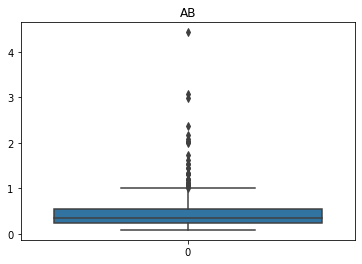

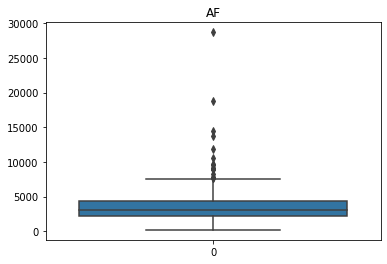

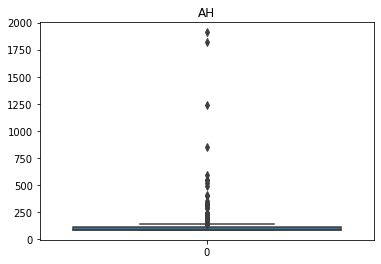

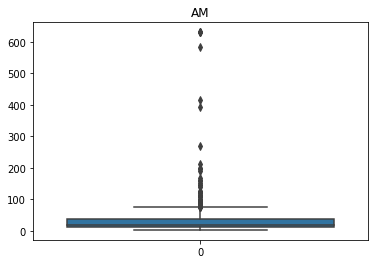

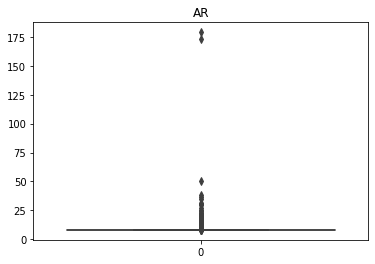

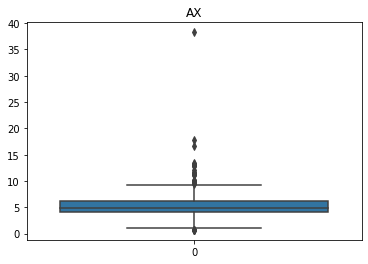

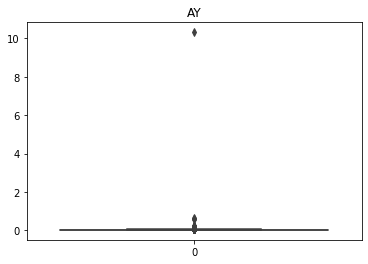

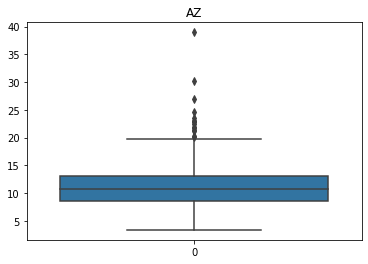

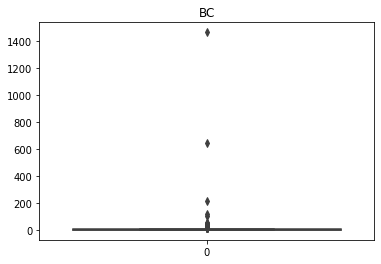

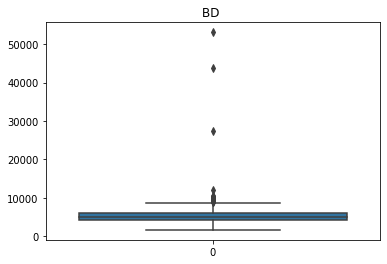

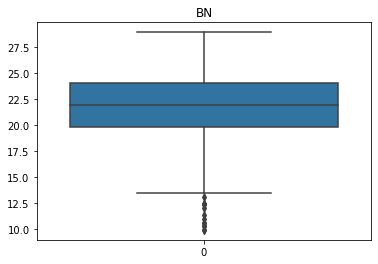

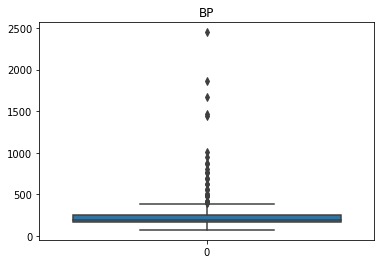

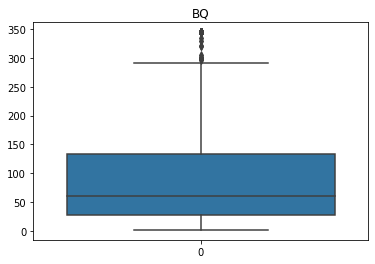

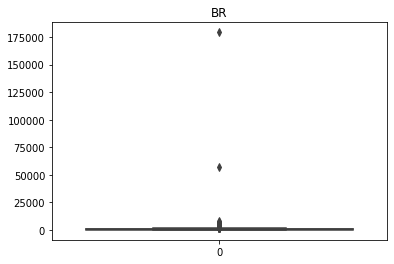

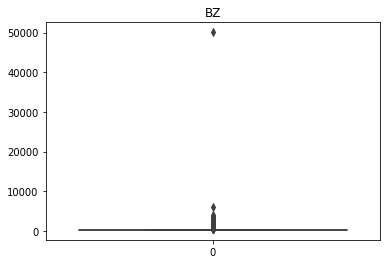

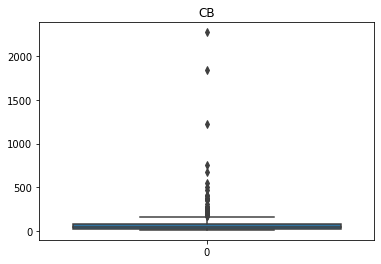

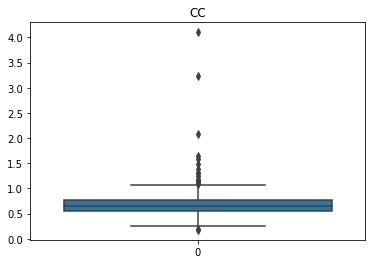

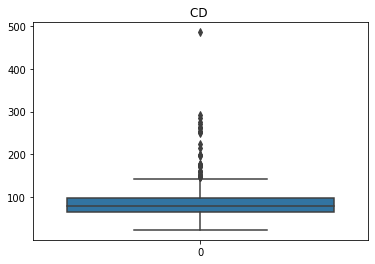

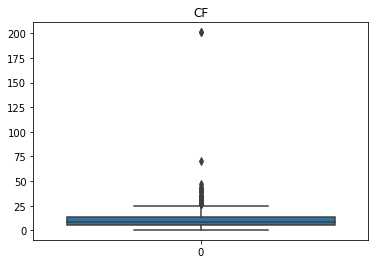

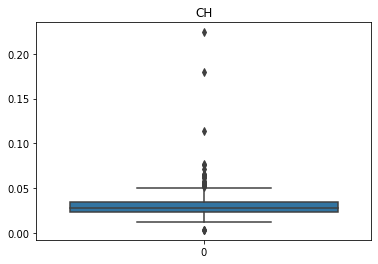

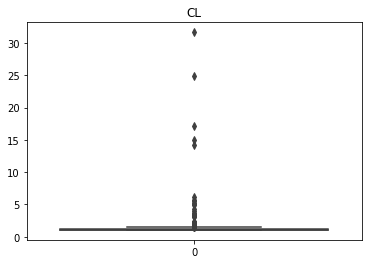

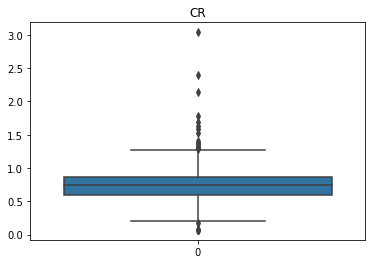

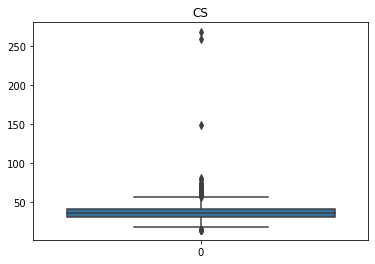

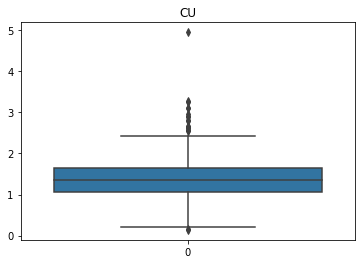

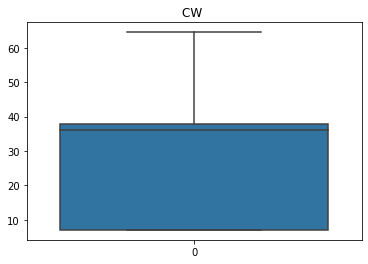

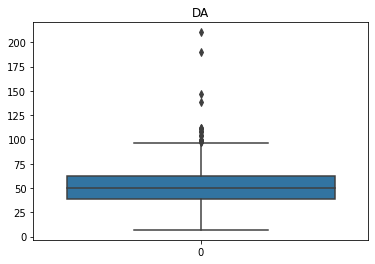

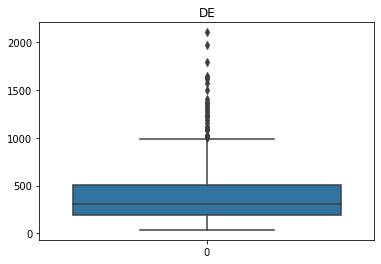

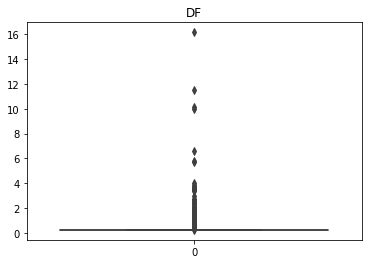

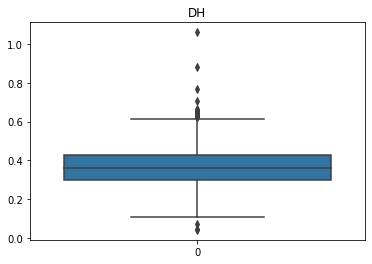

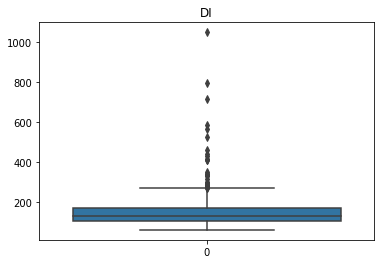

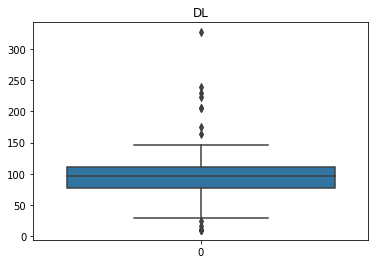

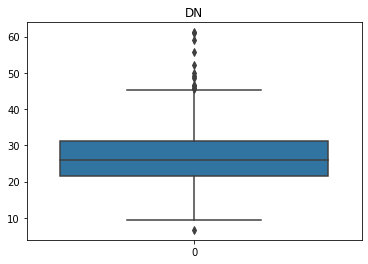

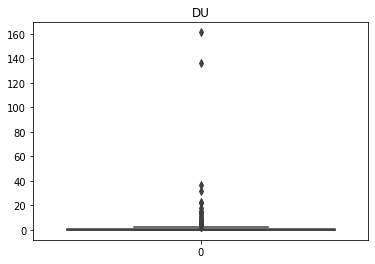

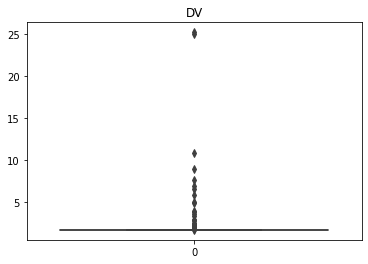

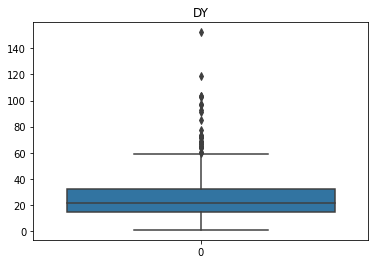

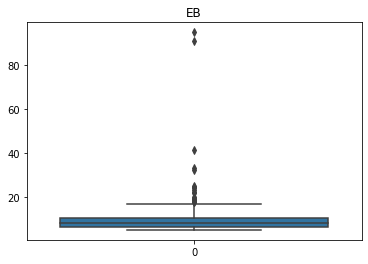

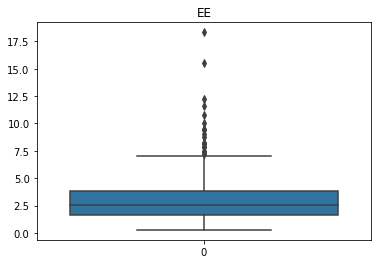

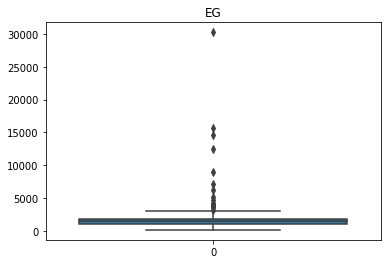

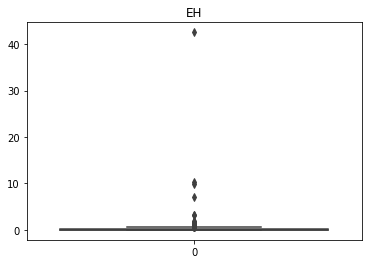

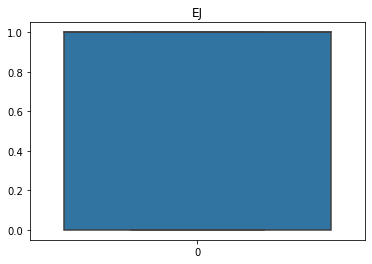

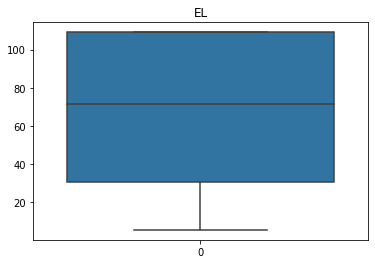

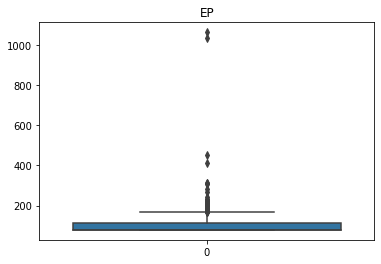

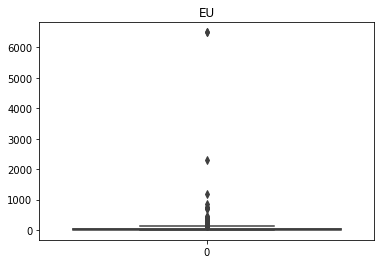

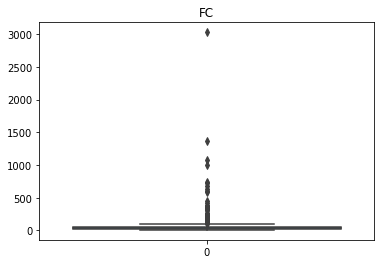

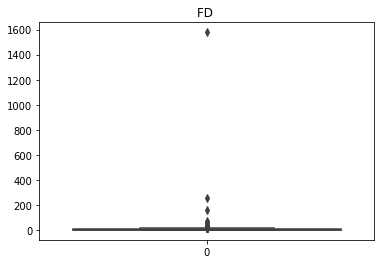

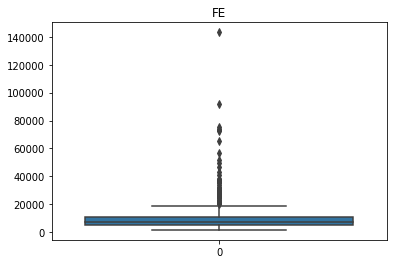

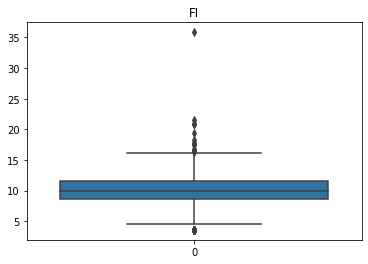

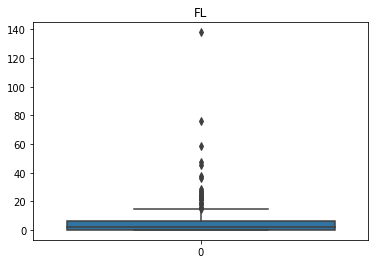

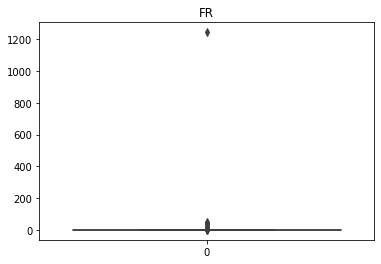

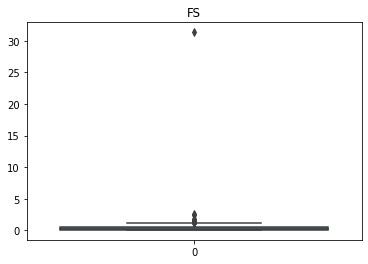

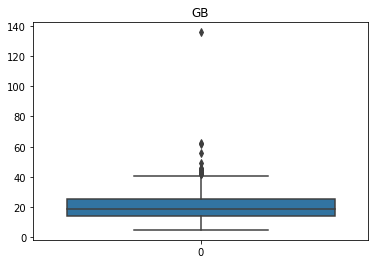

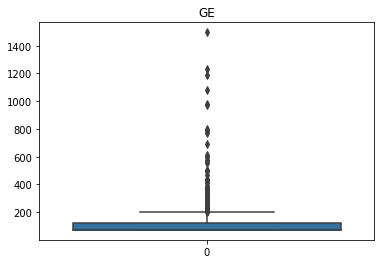

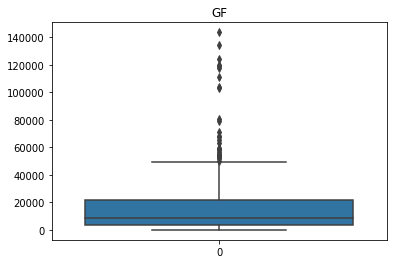

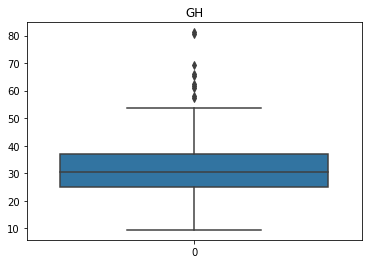

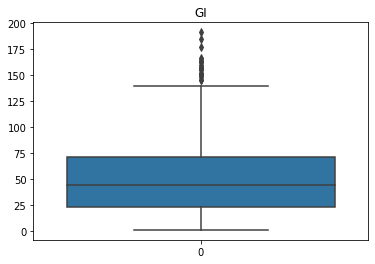

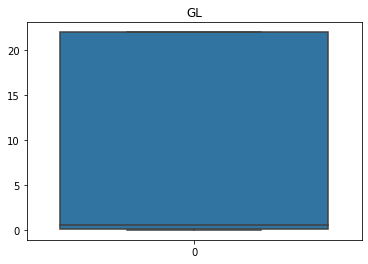

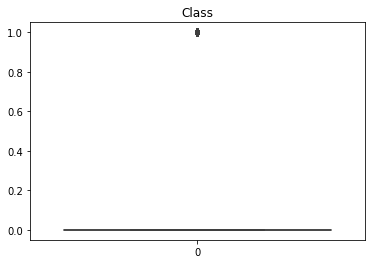

In [12]:
for i in train.columns:
    sns.boxplot(train[i])
    plt.title(f"{i}")
    plt.show()

In [13]:
train["Class"].value_counts()

Class
0    446
1    102
Name: count, dtype: int64

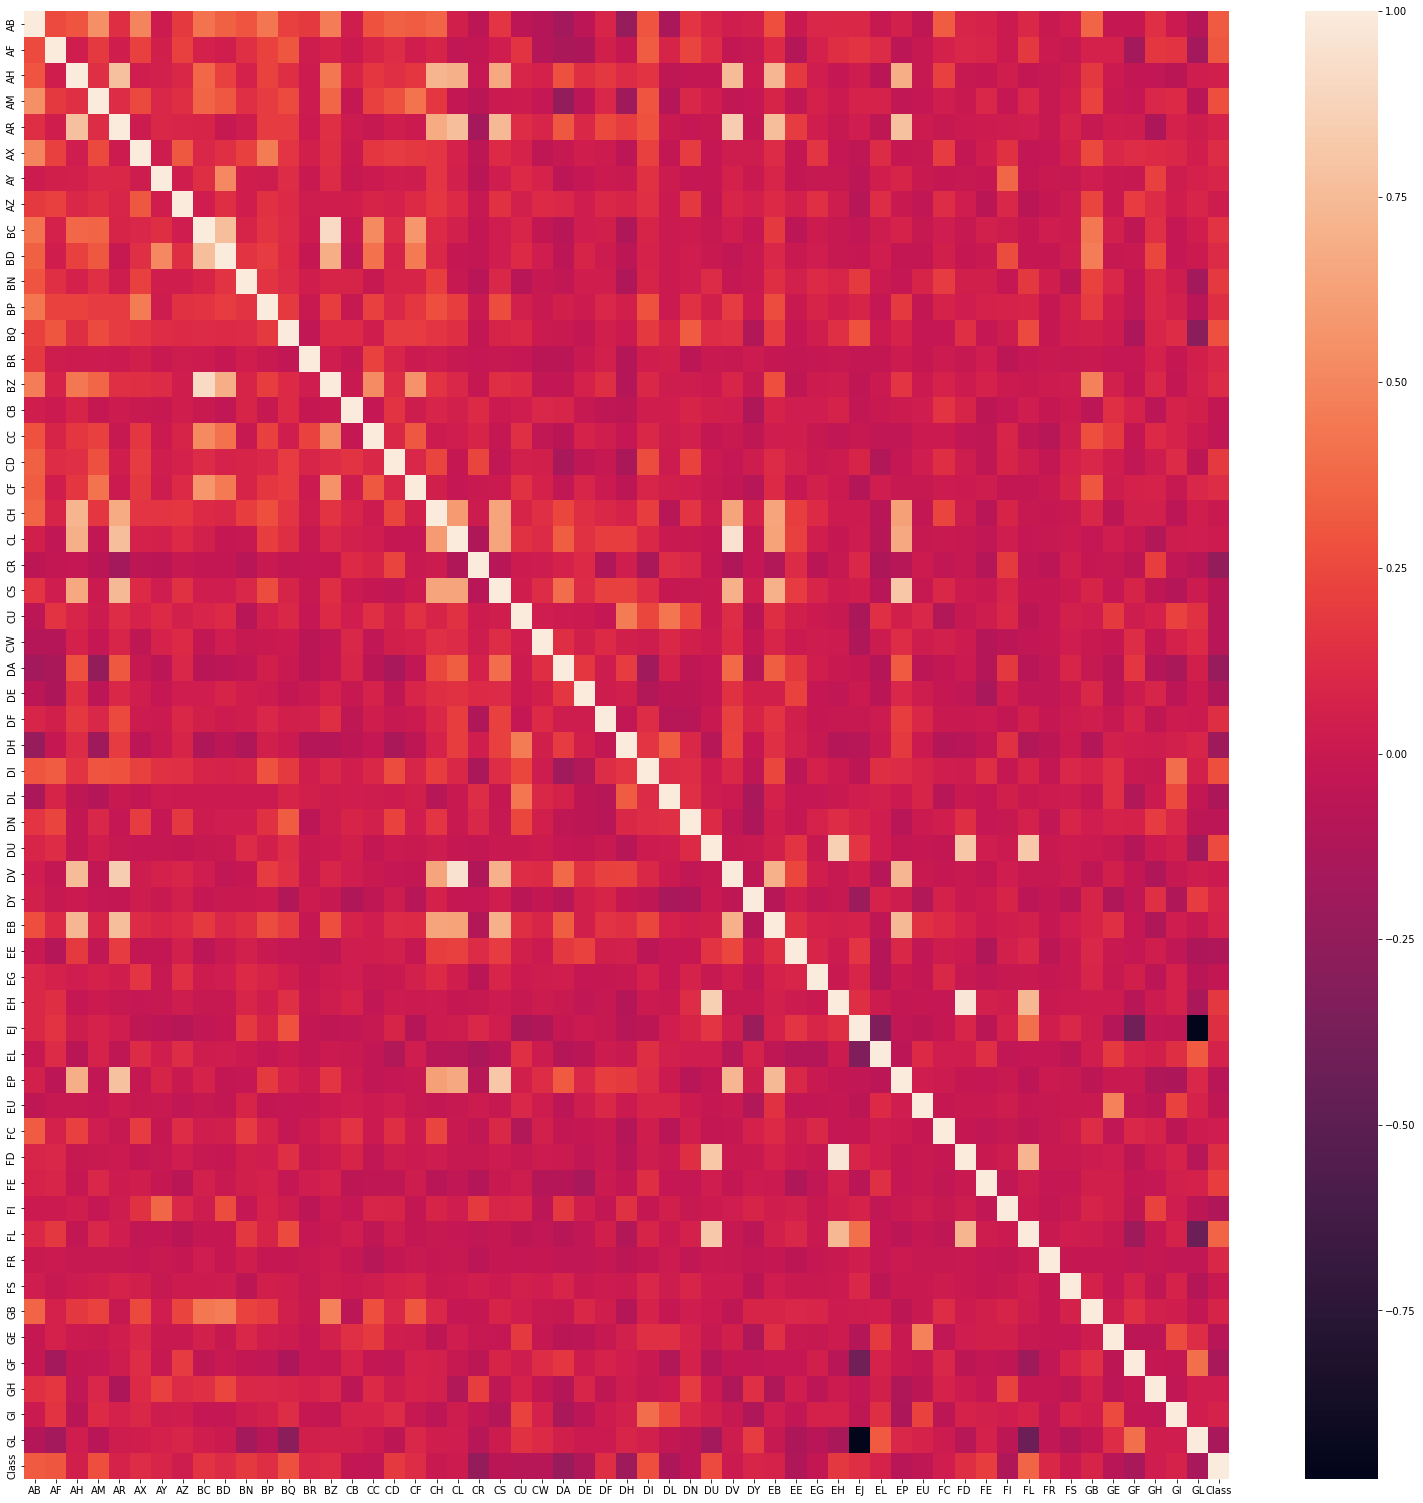

In [14]:
plt.figure(figsize=(27,27))
sns.heatmap(train.corr())
plt.show()

# Exploratory Data Analysis


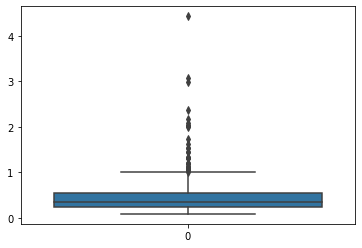

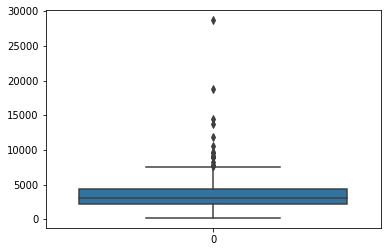

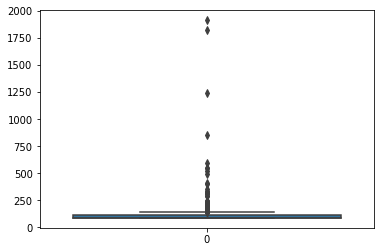

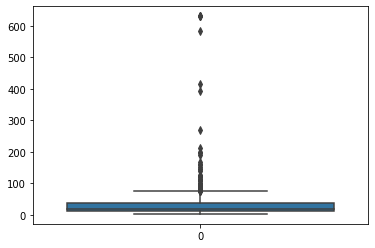

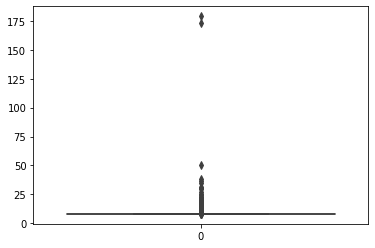

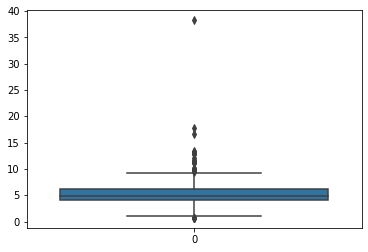

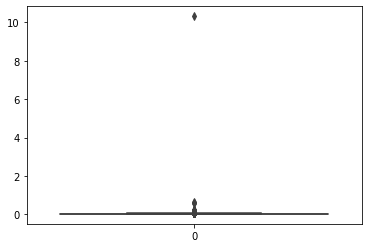

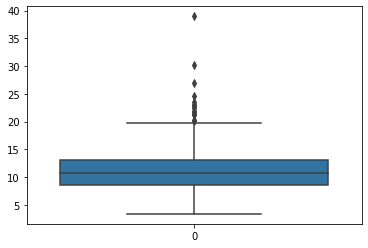

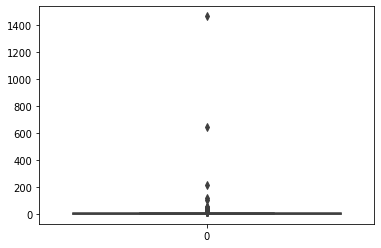

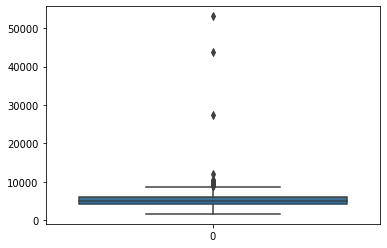

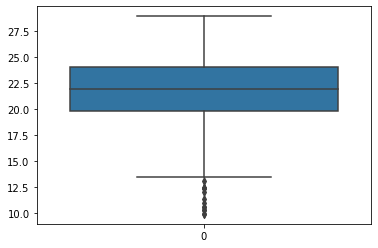

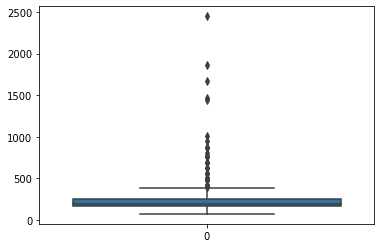

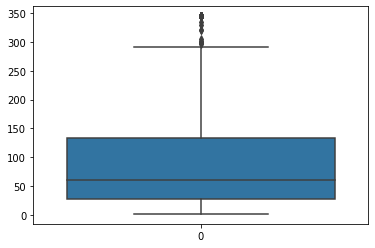

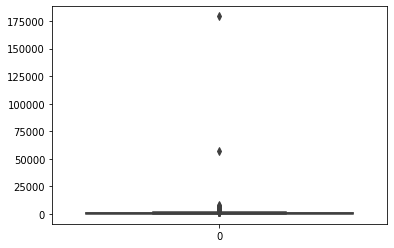

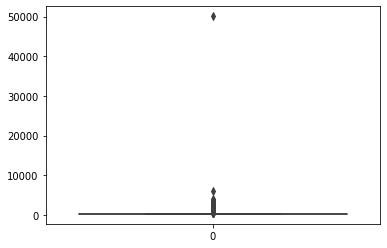

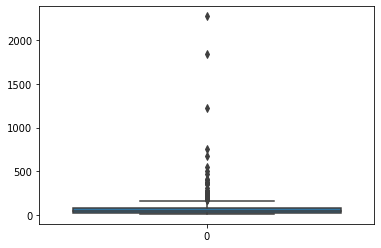

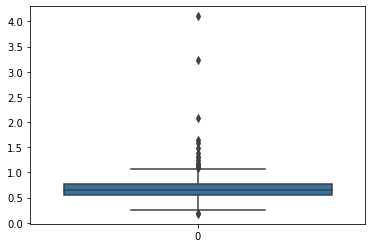

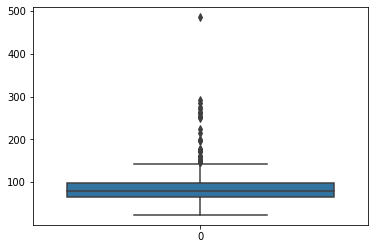

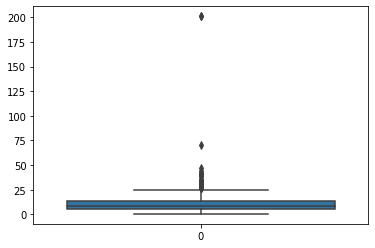

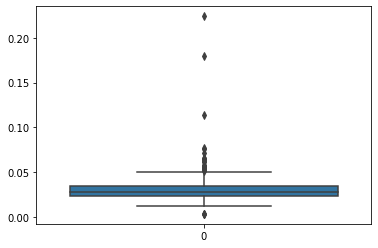

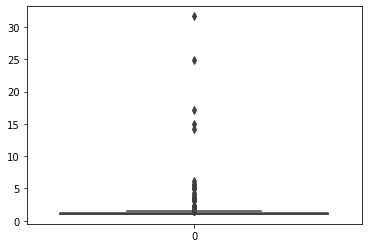

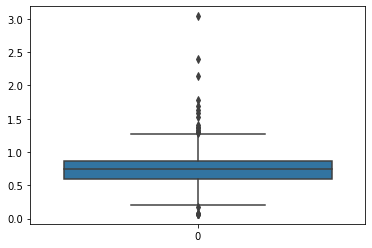

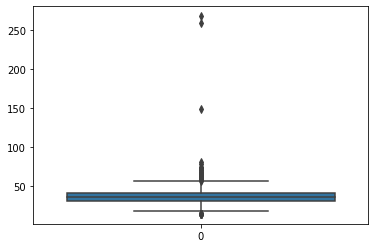

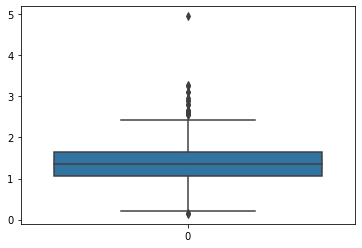

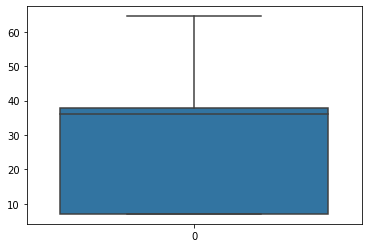

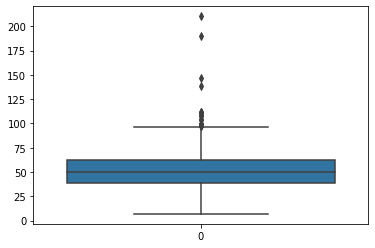

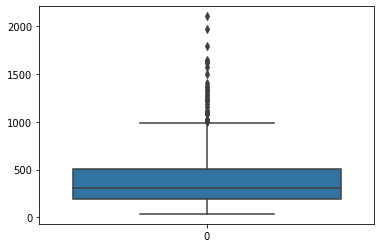

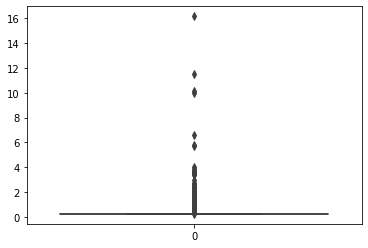

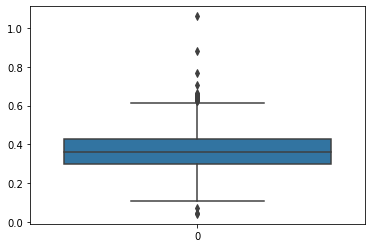

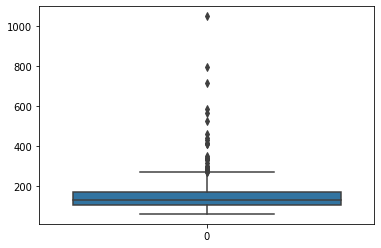

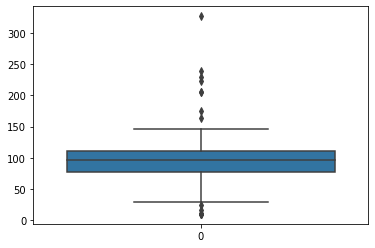

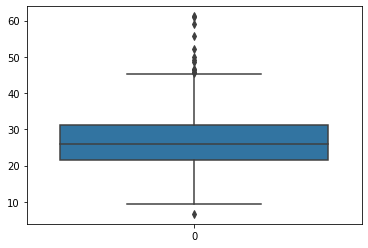

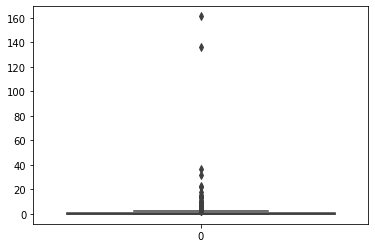

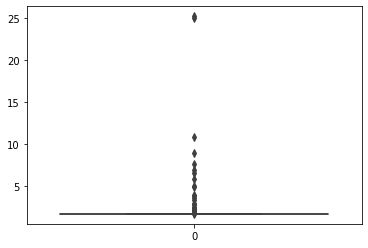

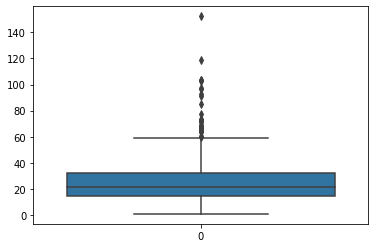

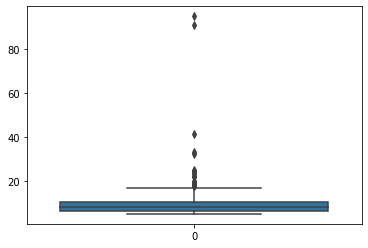

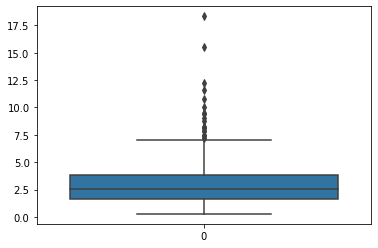

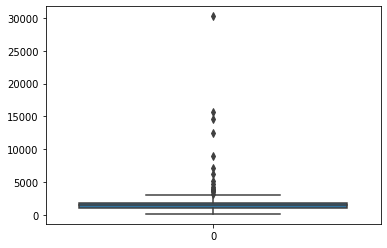

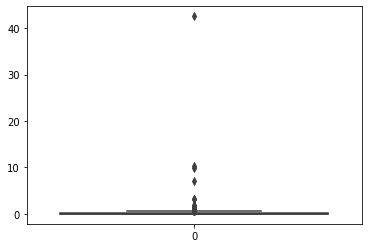

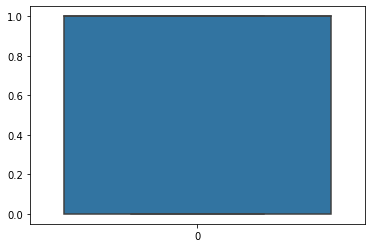

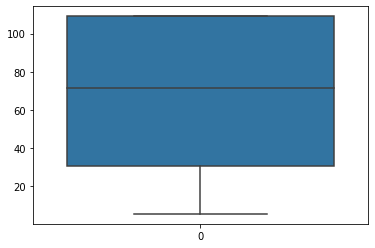

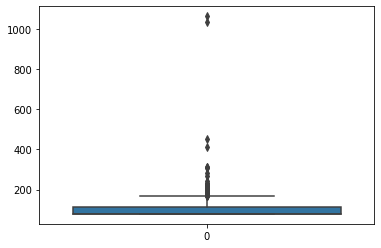

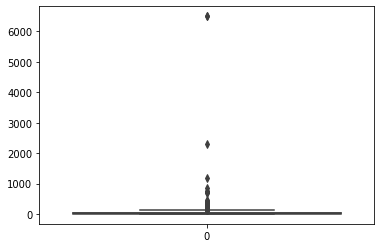

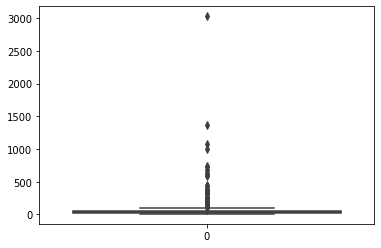

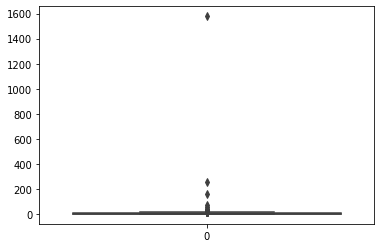

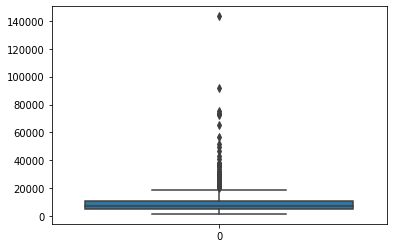

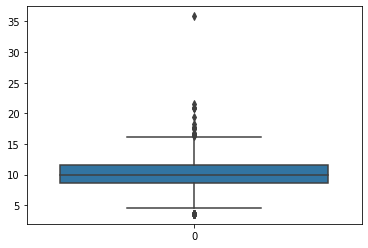

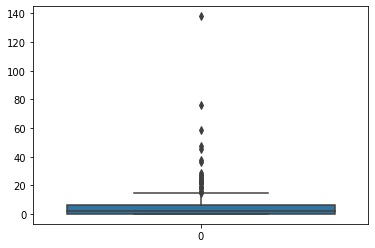

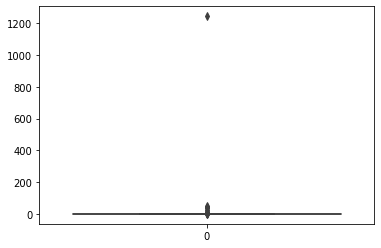

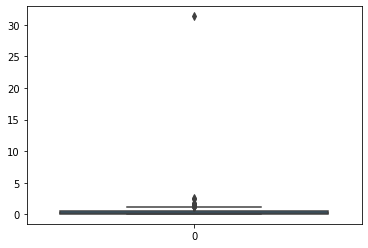

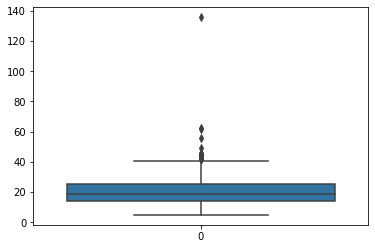

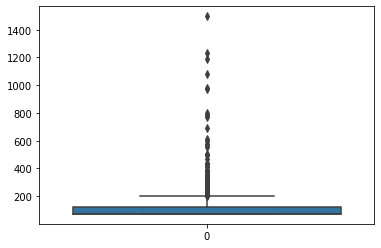

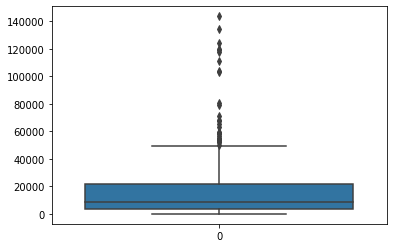

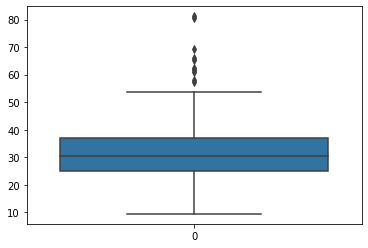

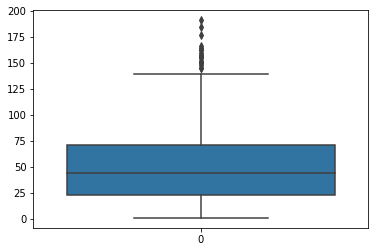

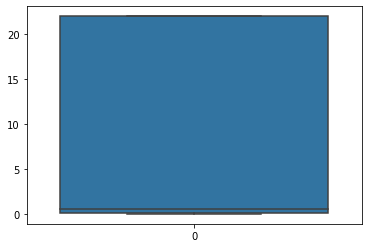

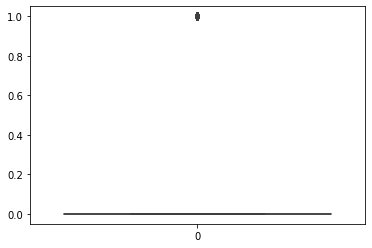

In [15]:
for i in train.columns:
  sns.boxplot(train[i])
  plt.show()

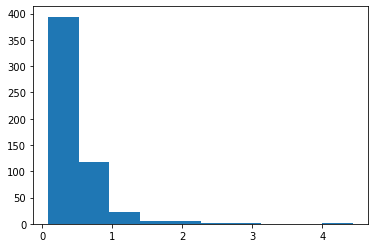

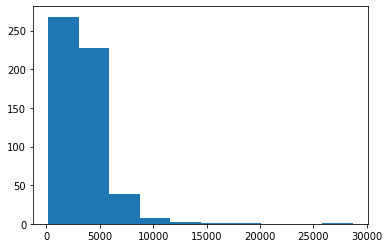

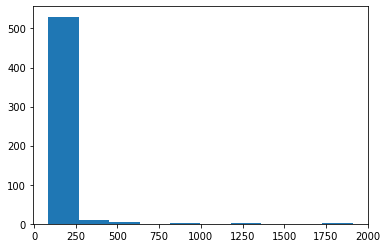

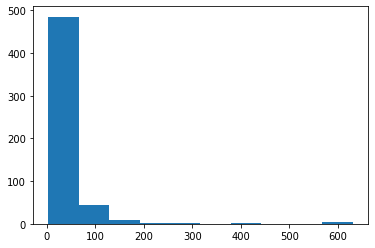

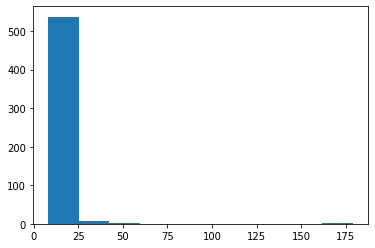

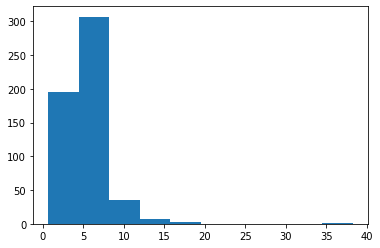

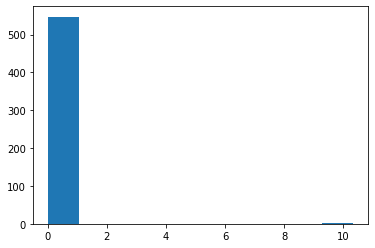

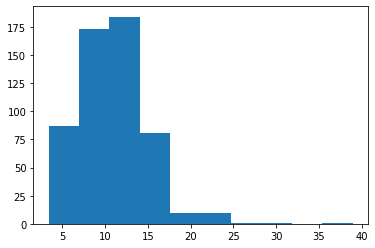

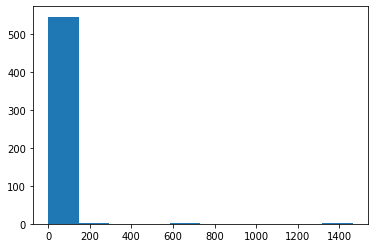

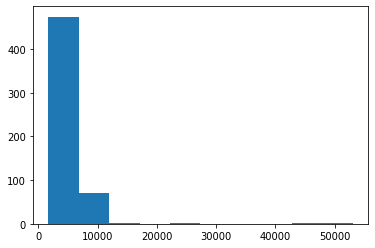

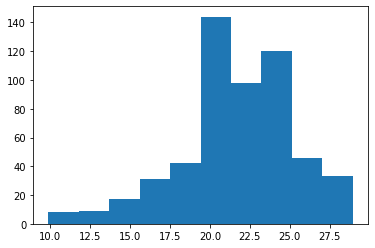

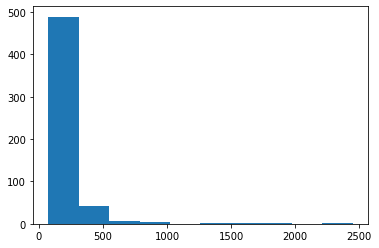

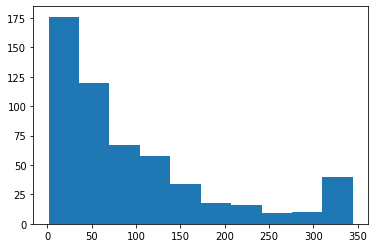

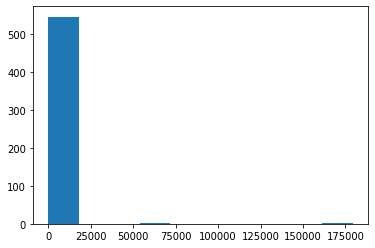

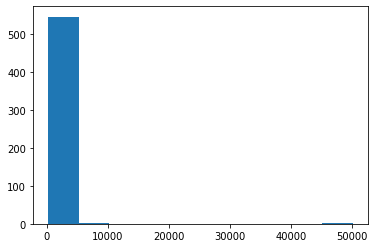

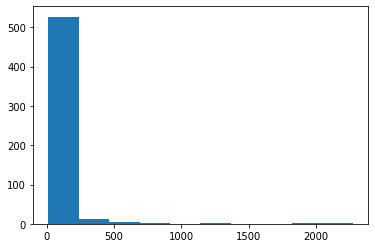

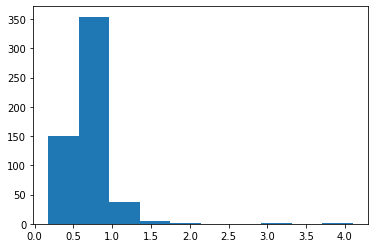

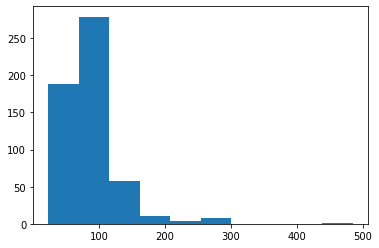

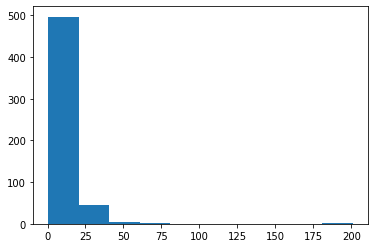

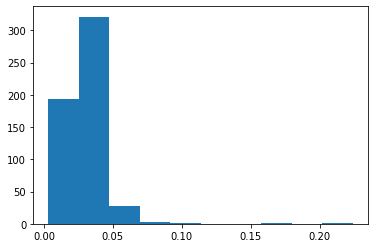

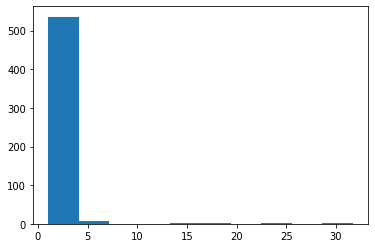

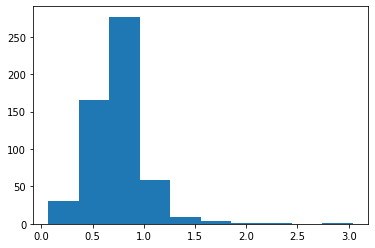

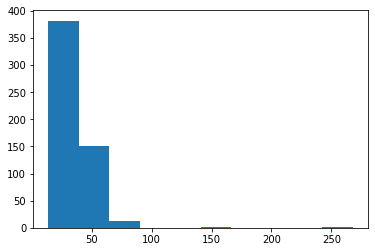

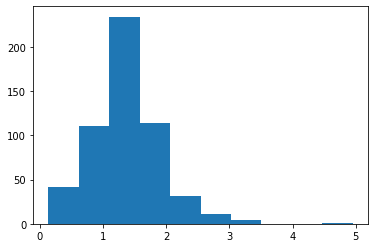

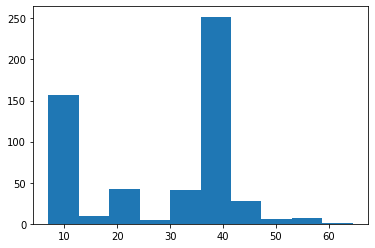

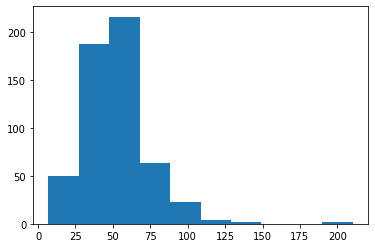

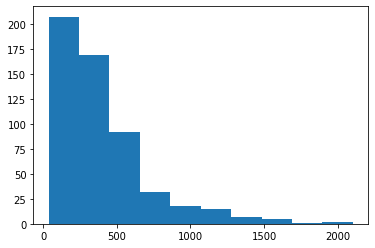

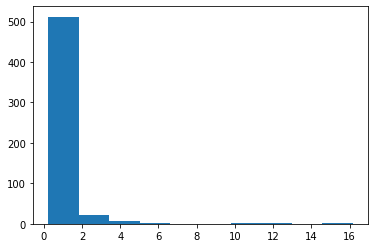

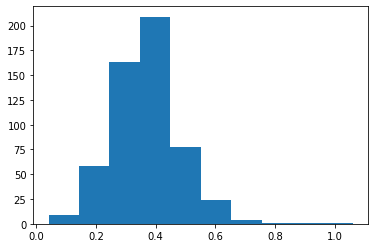

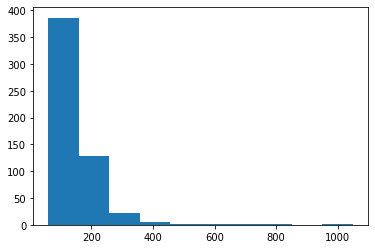

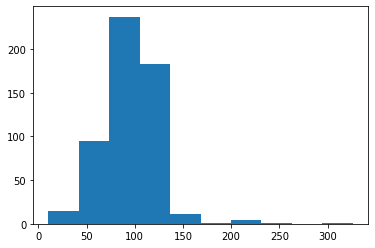

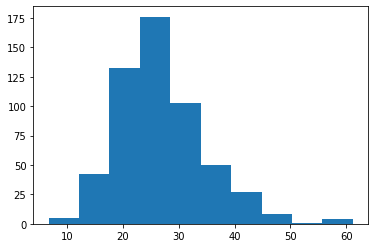

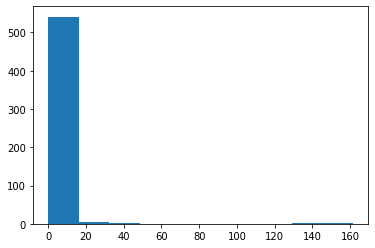

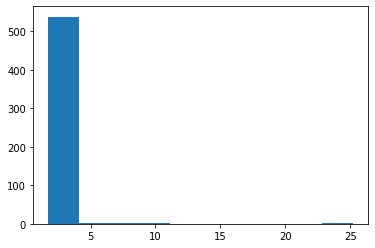

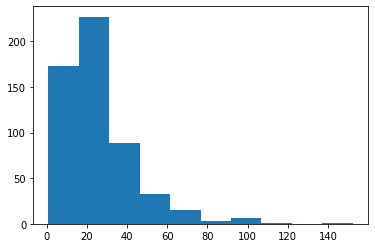

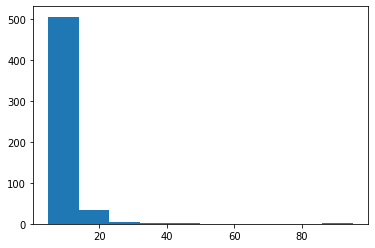

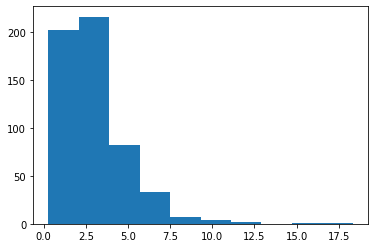

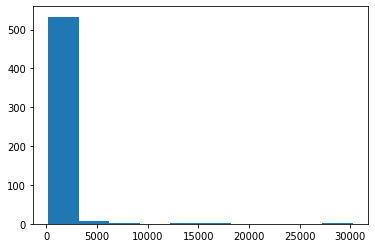

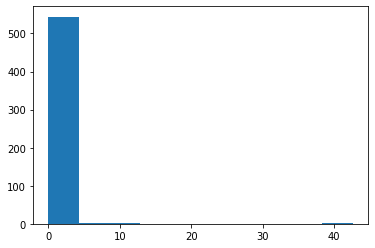

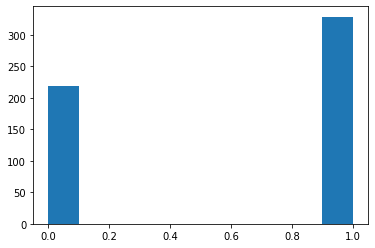

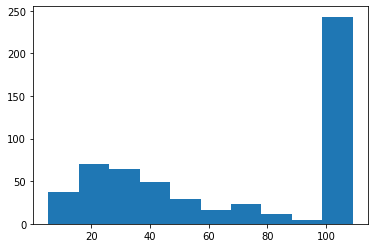

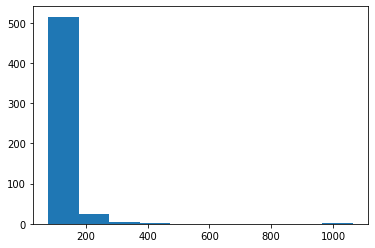

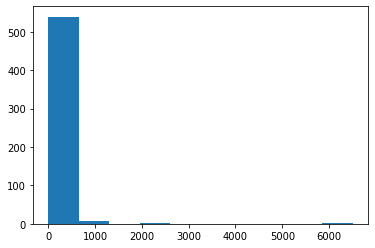

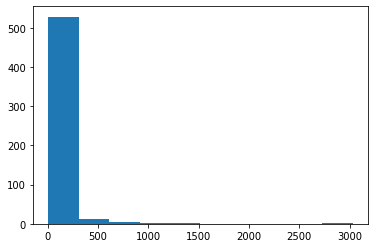

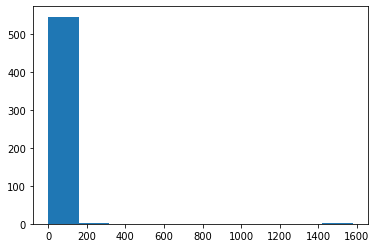

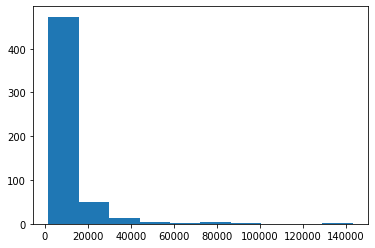

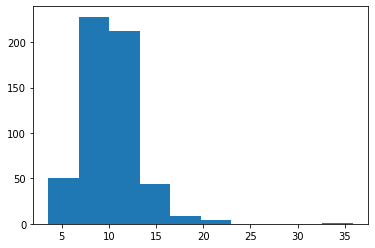

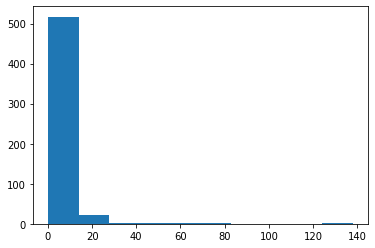

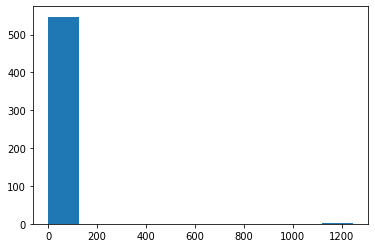

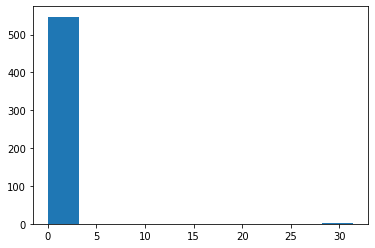

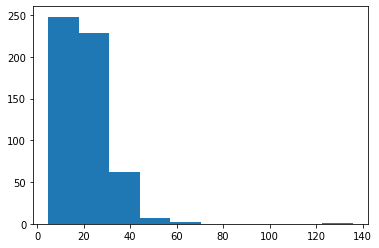

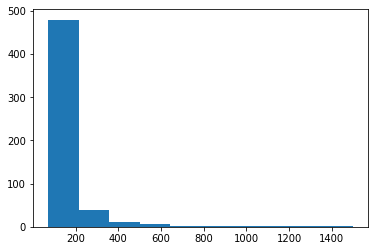

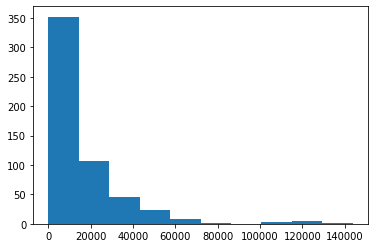

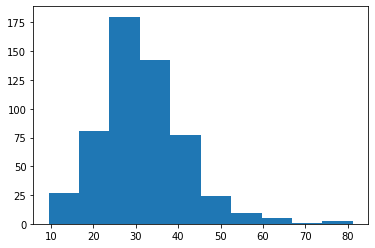

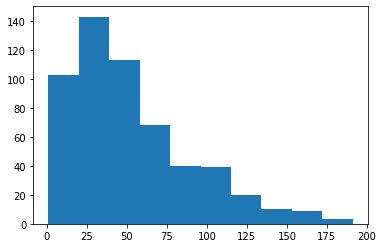

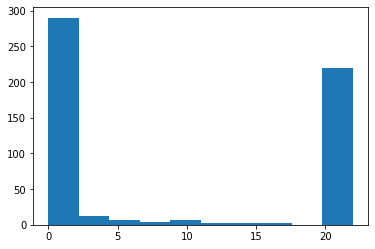

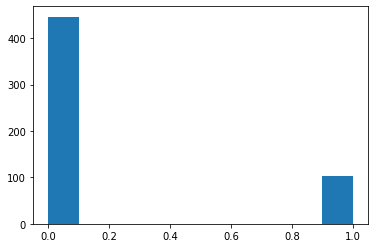

In [16]:
for i in train.columns:
  plt.hist(train[i])
  plt.show()

In [17]:
def count(data):
  sns.countplot(x = data,data=train)
  return plt.show()

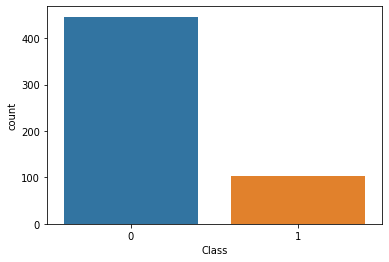

In [18]:
count(train["Class"])

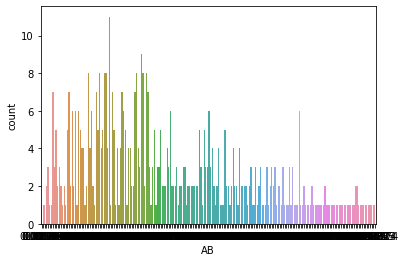

In [19]:
count(train["AB"])

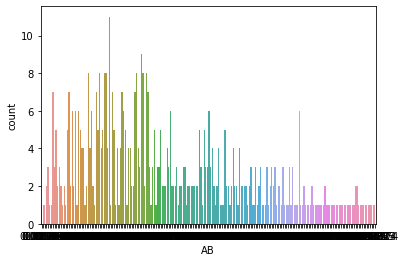

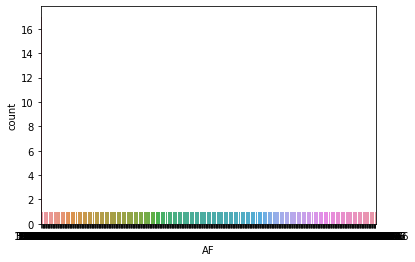

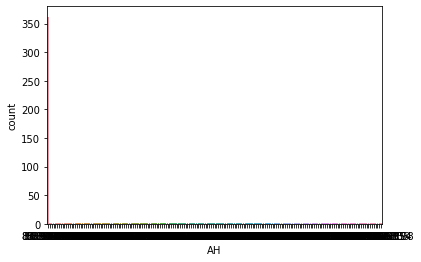

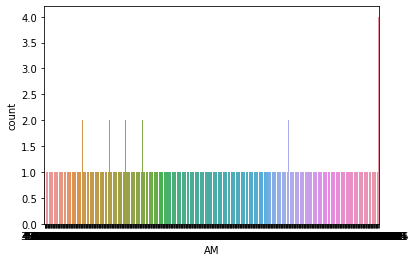

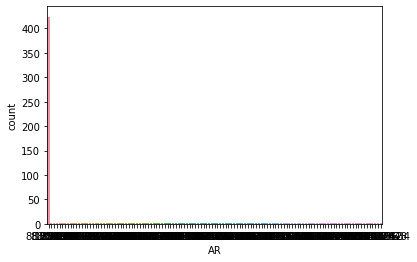

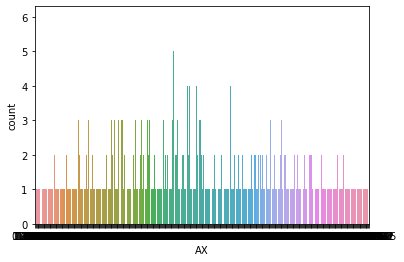

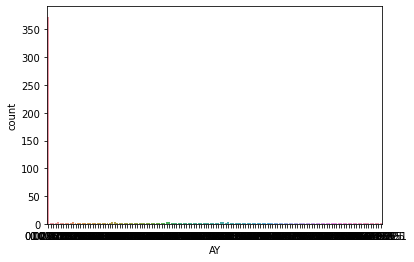

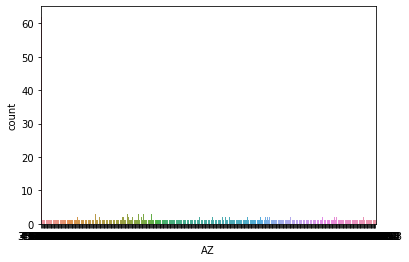

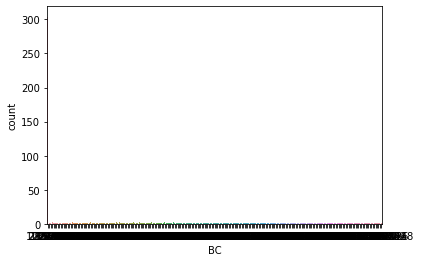

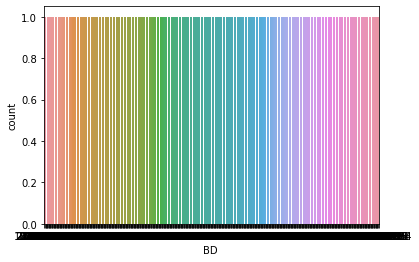

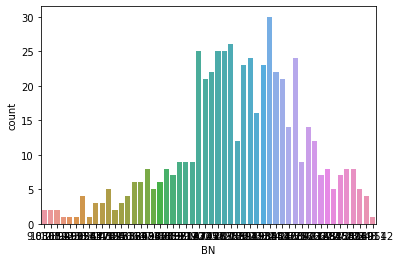

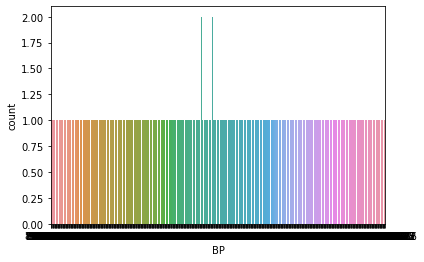

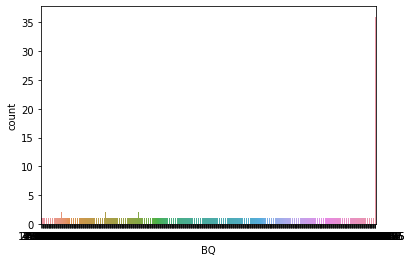

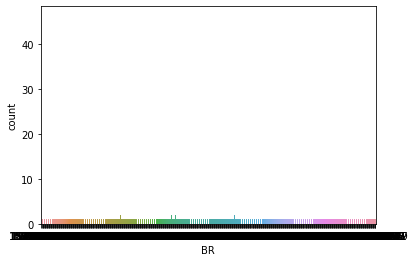

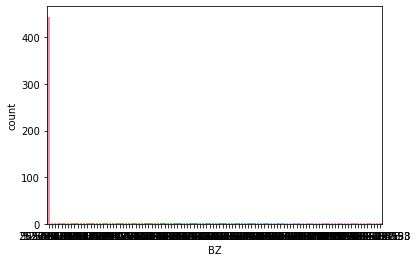

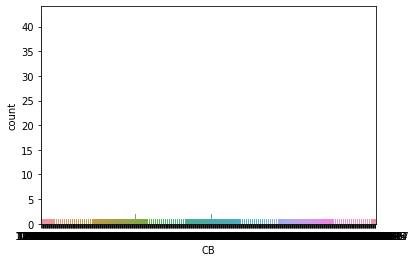

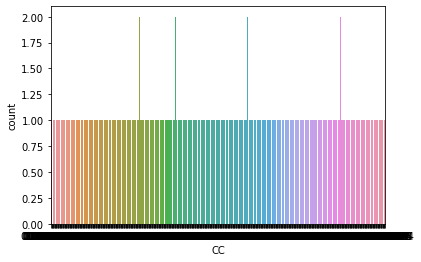

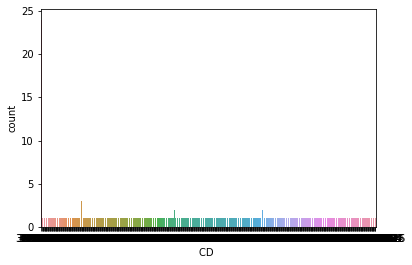

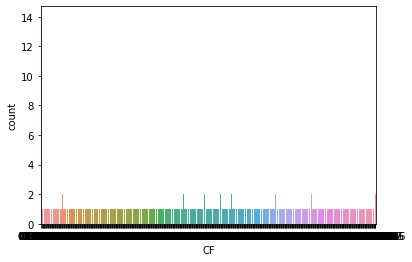

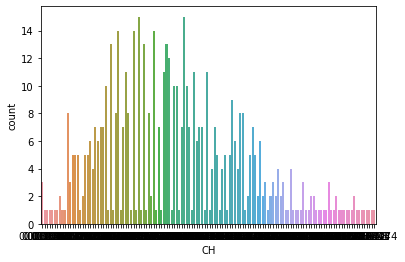

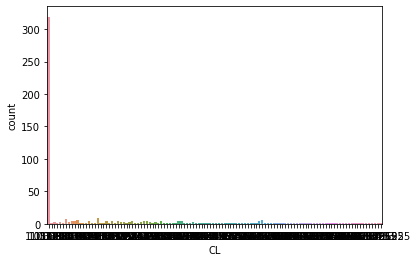

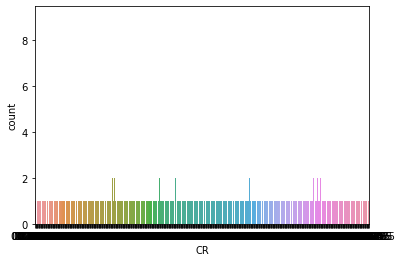

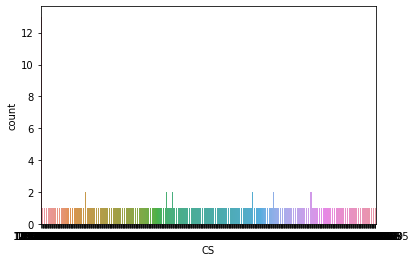

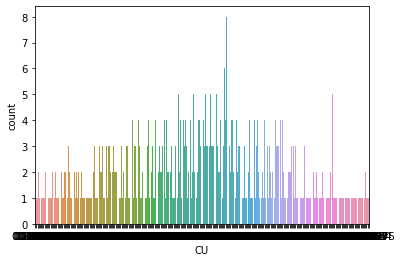

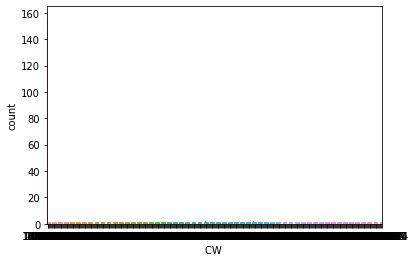

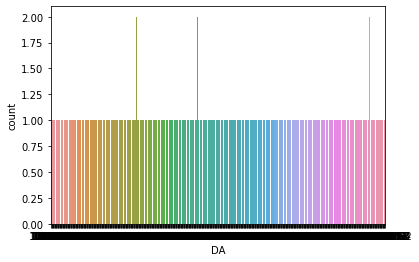

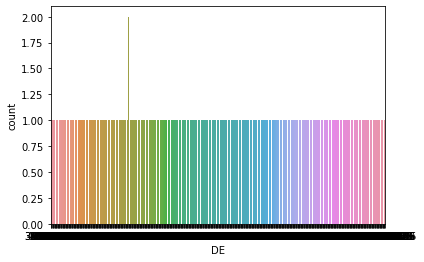

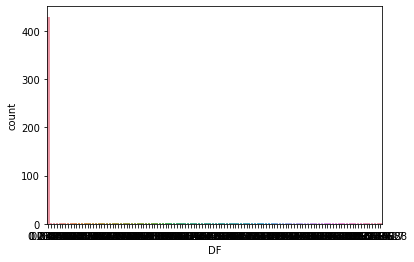

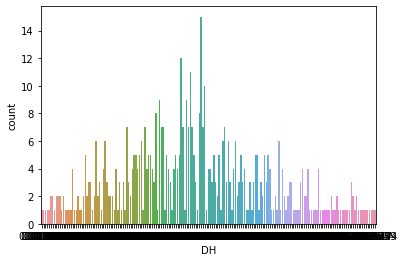

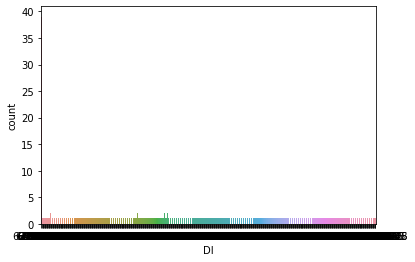

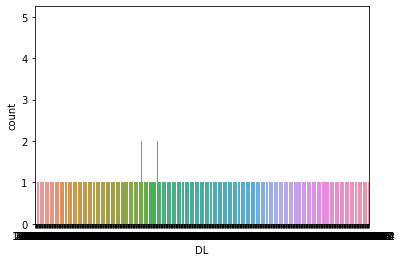

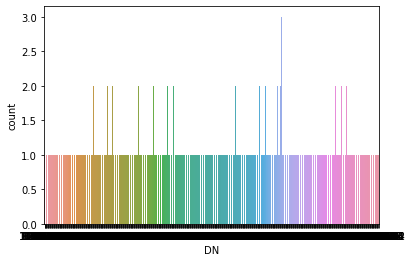

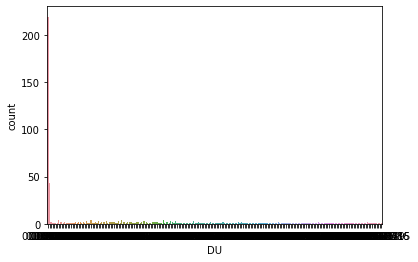

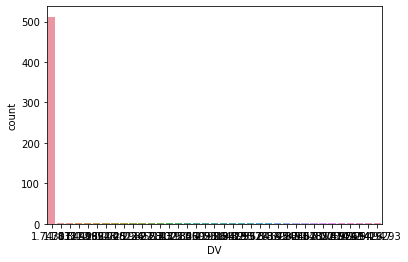

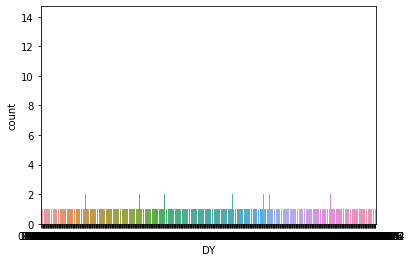

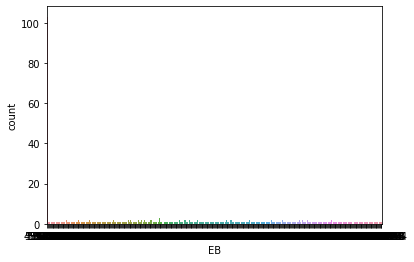

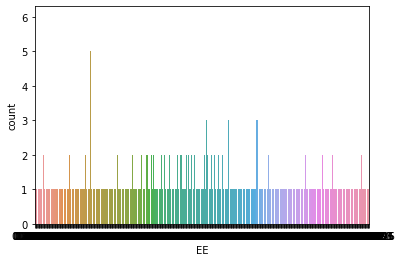

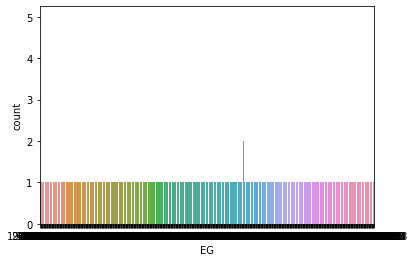

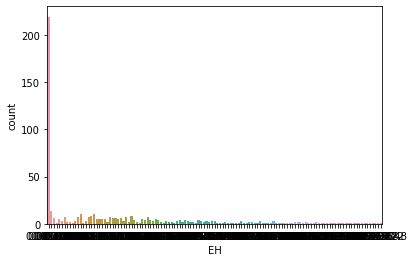

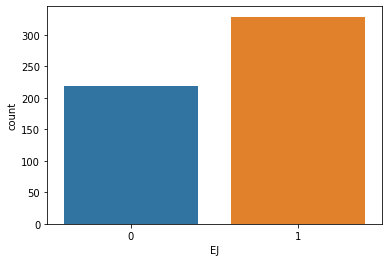

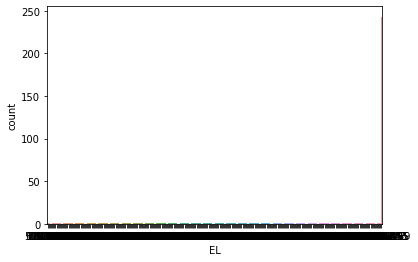

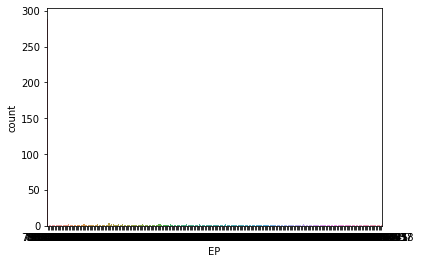

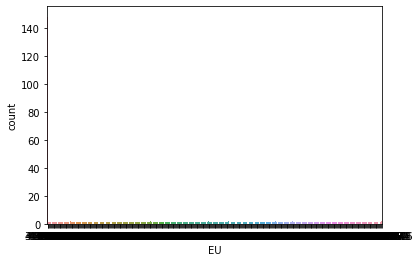

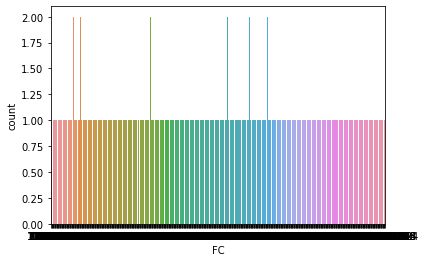

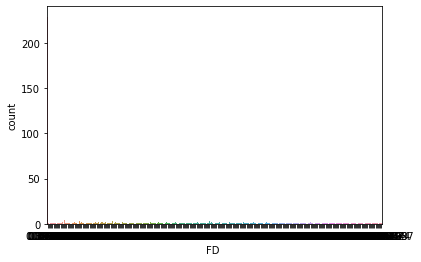

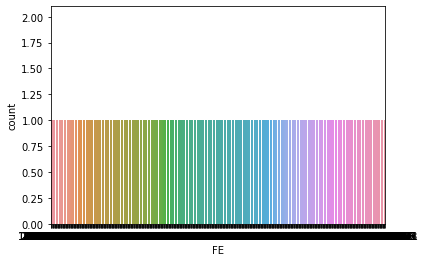

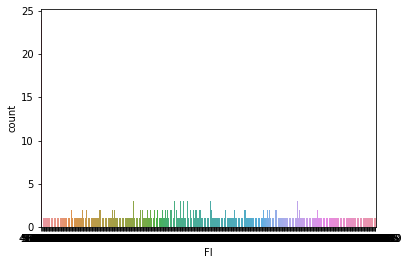

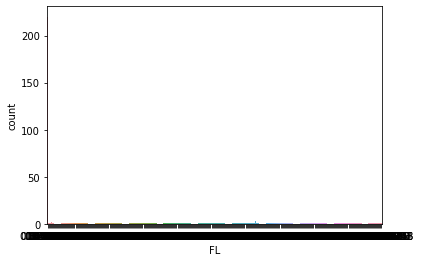

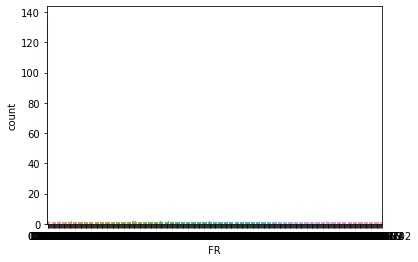

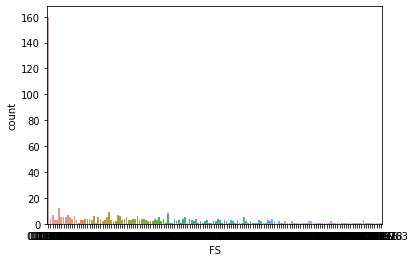

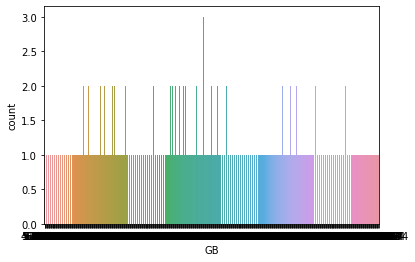

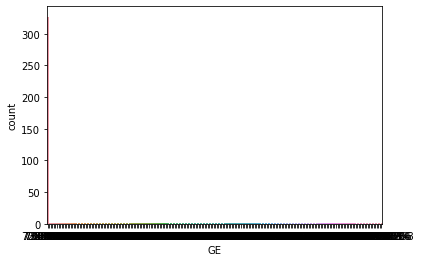

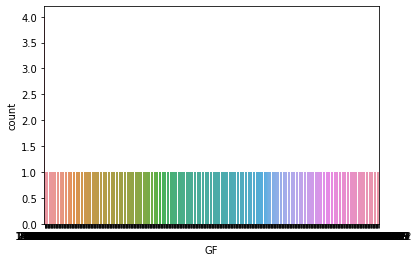

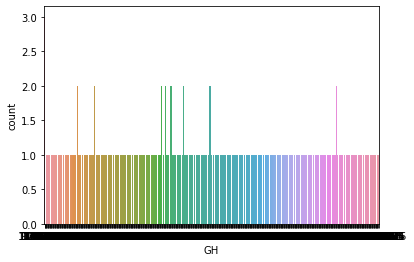

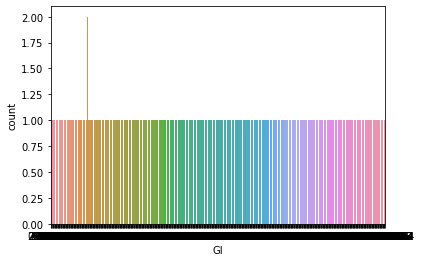

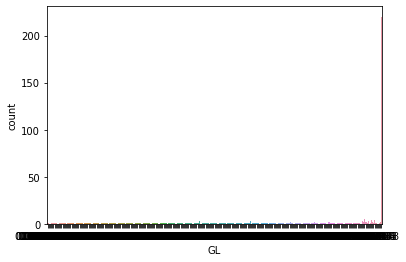

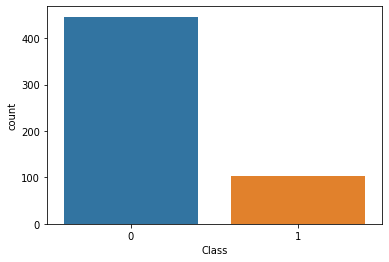

In [20]:
for i in train.columns:
  count(train[i])

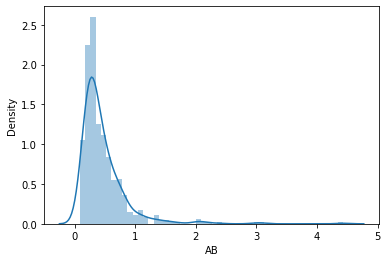

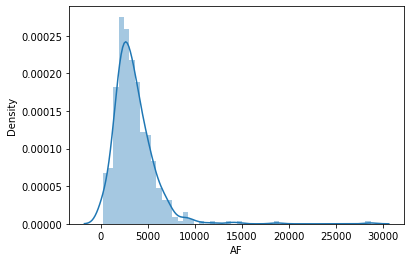

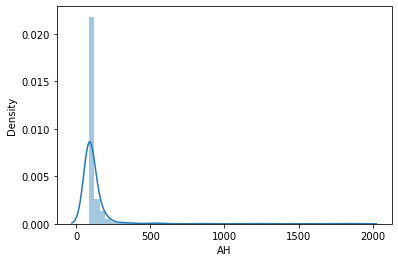

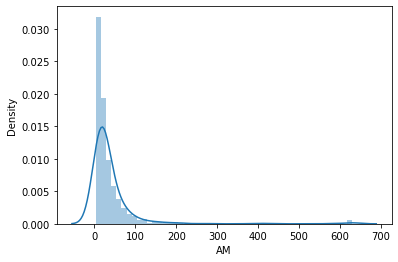

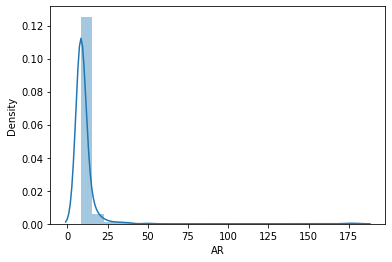

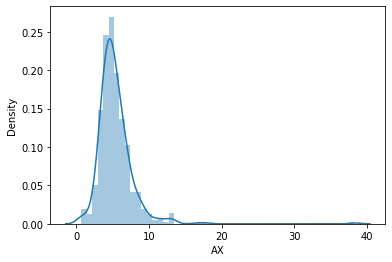

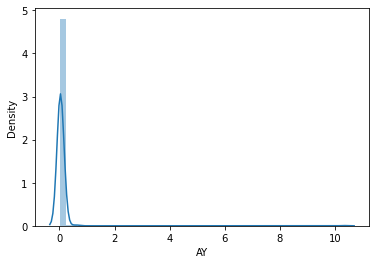

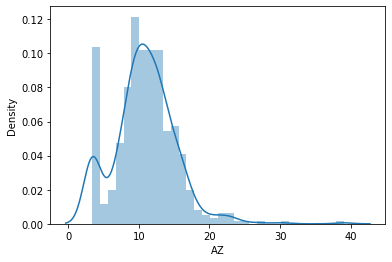

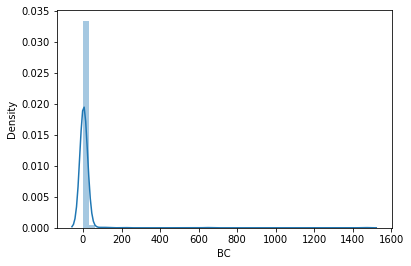

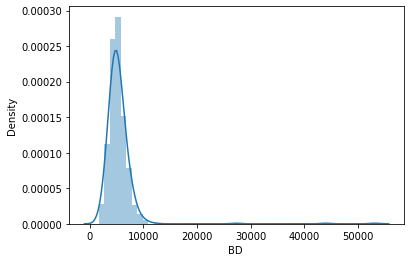

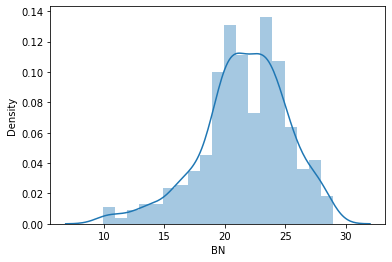

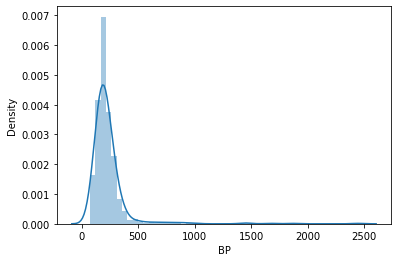

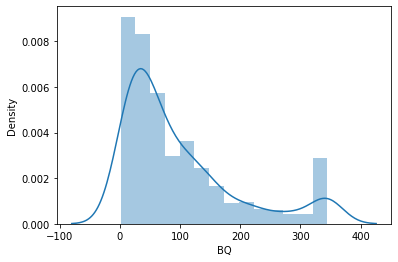

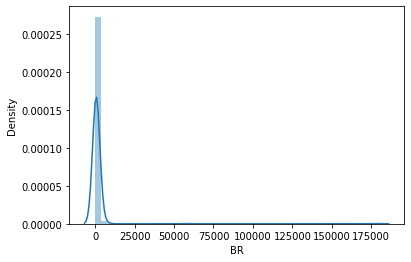

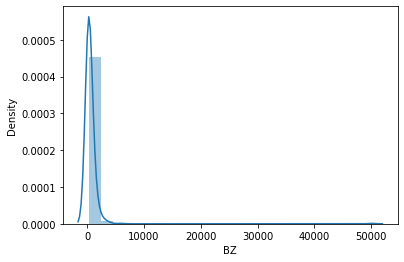

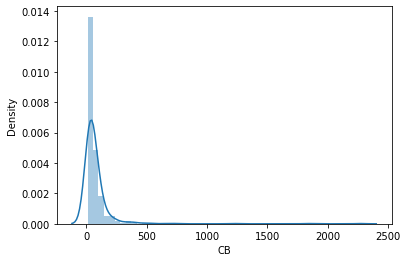

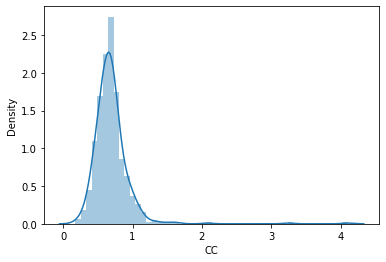

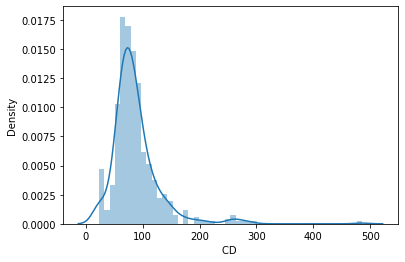

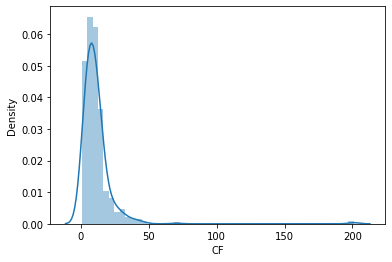

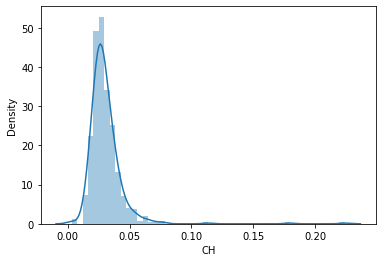

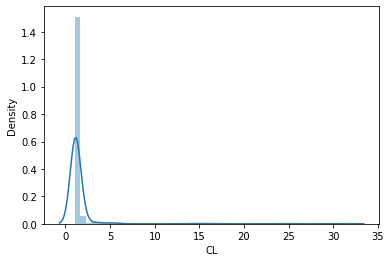

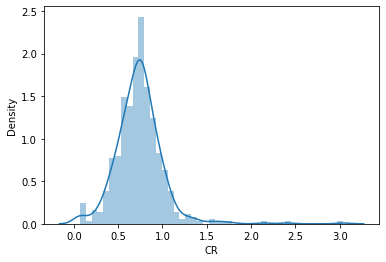

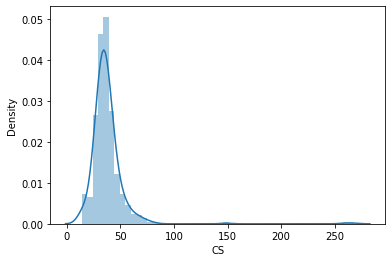

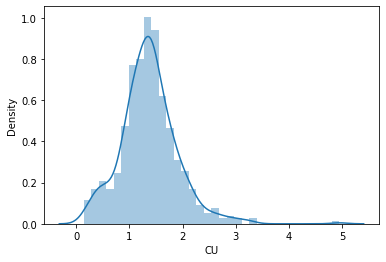

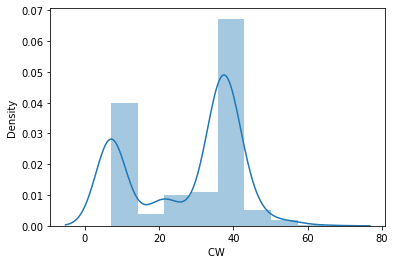

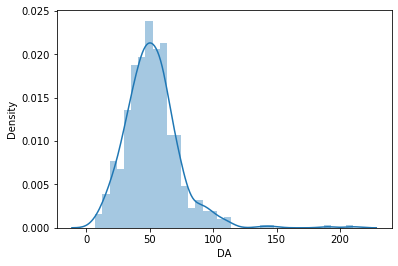

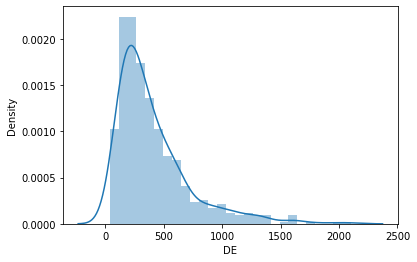

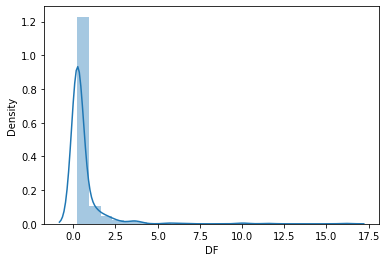

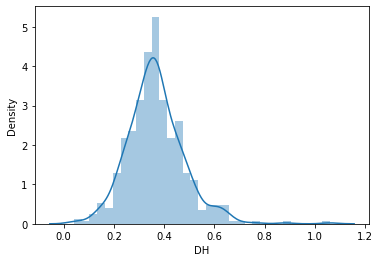

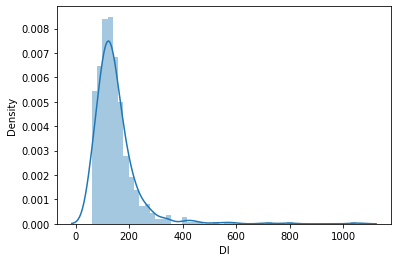

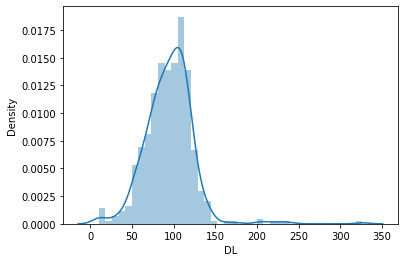

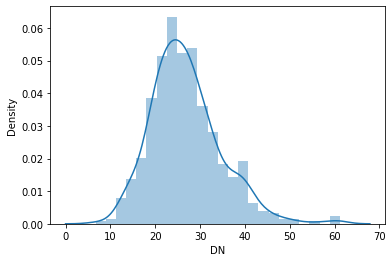

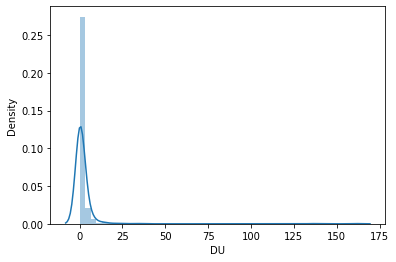

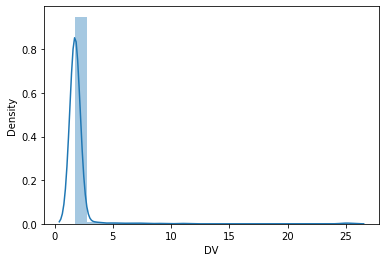

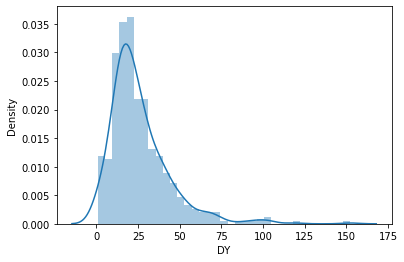

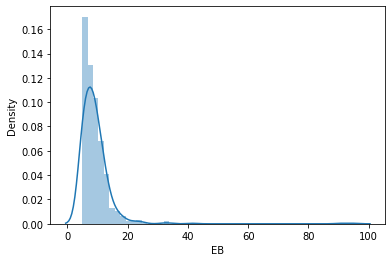

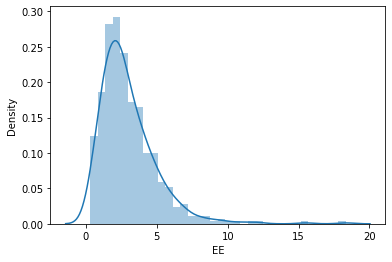

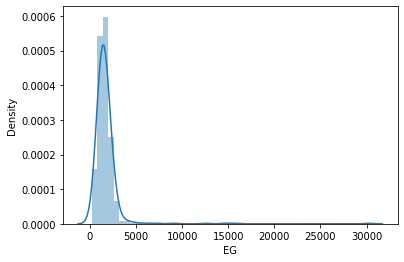

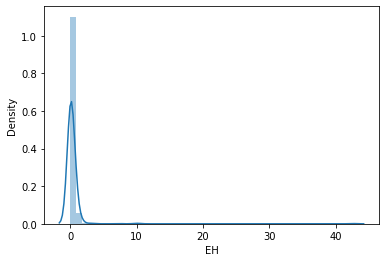

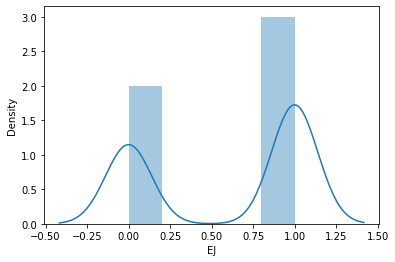

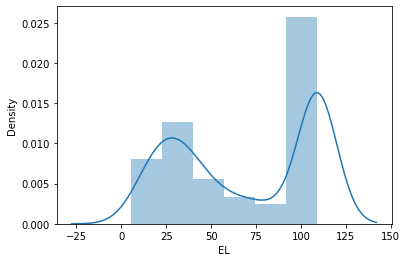

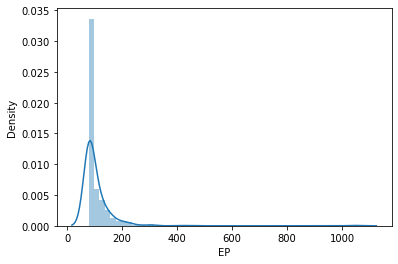

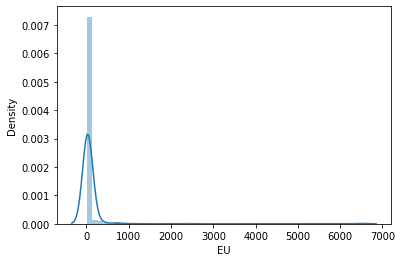

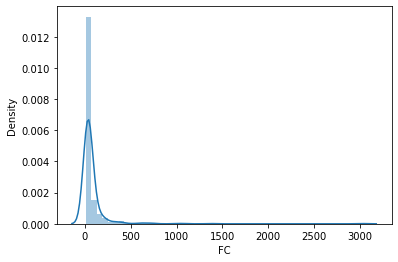

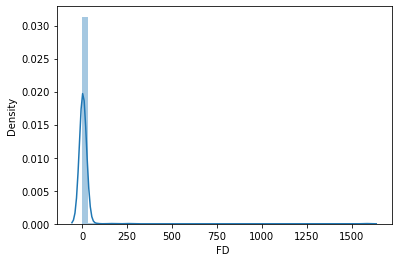

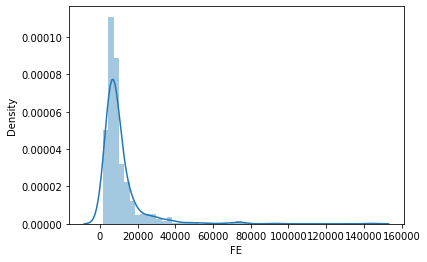

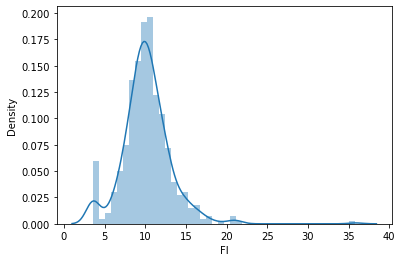

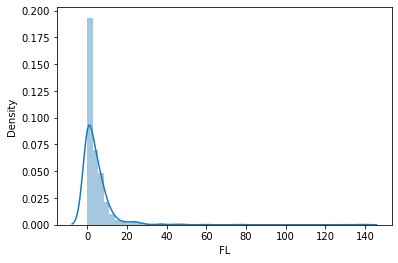

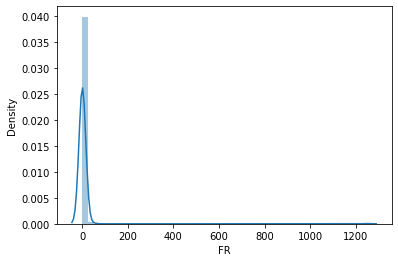

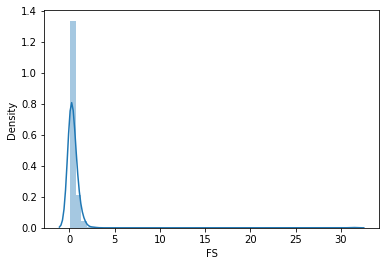

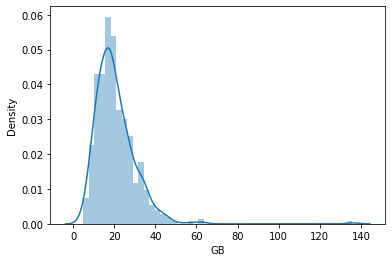

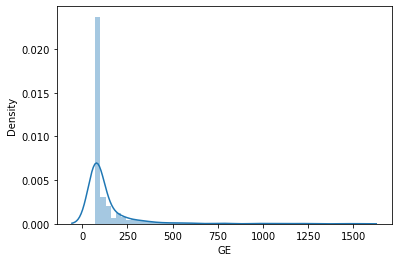

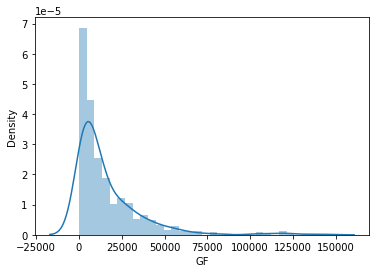

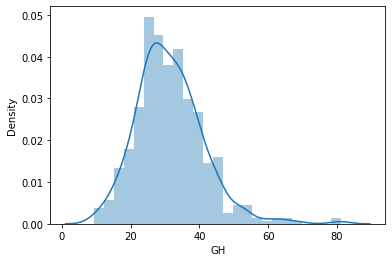

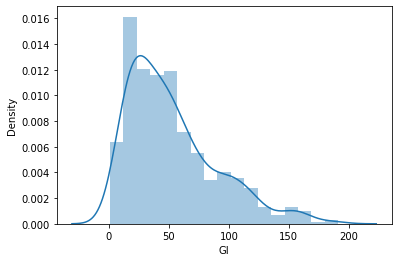

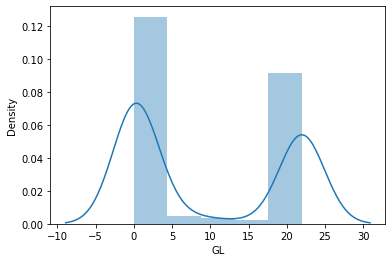

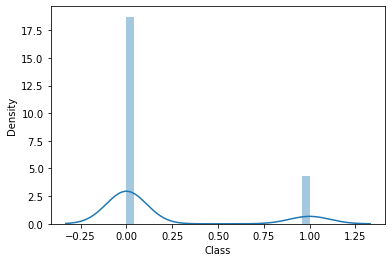

In [21]:
for i in train.columns:
  sns.distplot(train[i])
  plt.show()

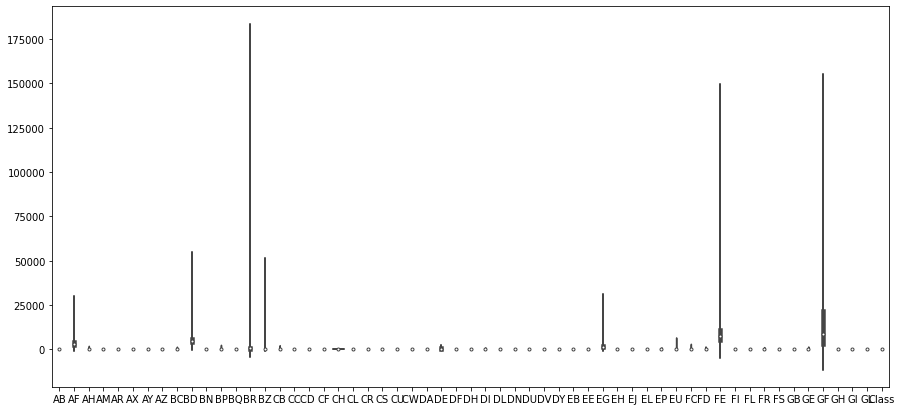

In [22]:
plt.figure(figsize=(15,7))
sns.violinplot(train)
plt.show()

In [23]:
train["Class"].value_counts()

Class
0    446
1    102
Name: count, dtype: int64

# Data Preprocessing 

In [24]:
x = train.drop(["Class"],axis=1)
y = train["Class"]

In [25]:
x.shape

(548, 56)

In [26]:
y.shape

(548,)

In [27]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [28]:
sampler = RandomOverSampler()
x,y = sampler.fit_resample(x,y)

In [29]:
y.value_counts()

Class
1    446
0    446
Name: count, dtype: int64

In [30]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Model evaluation

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [33]:
models = {"LogisticRegression":LogisticRegression(),
          "SVM":SVC(),
          "KNN":KNeighborsClassifier(),
          "Tree":DecisionTreeClassifier(),
          "Naive_Bayes":GaussianNB(),
         "RFC":RandomForestClassifier()}

parameters = {"LogisticRegression":{"C":[1,10,100],"penalty":["l1","l2"]},
              "SVM":{"C":[1,10,100],"kernel":["linear","rbfs"]},
              "KNN":{'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']},
              "Tree":{'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8]},
              "Naive_Bayes":{'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]},
              "RFC":{"criterion":["gini","entropy","log_loss"],
                    "max_depth":[2,4,6,8],
                    'min_samples_split': [2, 4, 6, 8]}}
              

In [34]:
for name,model in models.items():
  param = parameters[name]
  model = GridSearchCV(model,param,cv=5)
  model.fit(x,y)
  print("name :",name)
  print("score :",model.best_score_)
  print("parameter :",model.best_params_)

name : LogisticRegression
score : 0.9024292260372857
parameter : {'C': 100, 'penalty': 'l2'}
name : SVM
score : 0.9259870692360807
parameter : {'C': 100, 'kernel': 'linear'}
name : KNN
score : 0.9383403427280145
parameter : {'n_neighbors': 9, 'weights': 'distance'}
name : Tree
score : 0.9428158935408952
parameter : {'max_depth': 8, 'min_samples_split': 4}
name : Naive_Bayes
score : 0.6916891595003453
parameter : {'var_smoothing': 1e-09}
name : RFC
score : 0.9764672650806604
parameter : {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 4}


# Build Model

In [63]:
DTC_model = DecisionTreeClassifier(max_depth=8,min_samples_split=2)
DTC_model.fit(x,y)

DecisionTreeClassifier(max_depth=8)

In [64]:
DTC_model.score(x,y)

0.992152466367713

In [65]:
RFC_model = RandomForestClassifier(n_estimators=10000,criterion='gini',max_depth=8,min_samples_split=8,random_state=2)

RFC_model.fit(x,y)

RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=10000,
                       random_state=2)

In [59]:
RFC_model.score(x,y)

1.0

In [115]:
knn_model = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_model.fit(x,y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [116]:
model.score(x,y)

1.0

# Model Evaluation

In [41]:
test = pd.read_csv("/home/datahagward/Downloads/icr-identify/test.csv")
test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
from sklearn.pipeline import Pipeline

In [43]:
Id = test.Id

In [44]:
test = test.drop(["Id"],axis=1)
test.head(2)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
test["EJ"].replace({"A":0},inplace=True)

In [46]:
test = scaler.transform(test)

In [119]:
y_prediction = RFC_model.predict_proba(test)
predictions = pd.DataFrame(y_prediction,columns=["predicted_class_0","predicted_class_1"])

In [120]:
probability = RFC_model.predict_proba(test)
probability

array([[0.69431801, 0.30568199],
       [0.69431801, 0.30568199],
       [0.69431801, 0.30568199],
       [0.69431801, 0.30568199],
       [0.69431801, 0.30568199]])

In [121]:
sample_submission = pd.read_csv("/home/datahagward/Downloads/icr-identify/sample_submission.csv")
sample_submission


,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5


In [4]:
greeks = pd.read_csv("/home/datahagward/Downloads/icr-identify/greeks.csv")
greeks

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020
...,...,...,...,...,...,...
612,fd3dafe738fd,A,B,M,B,9/13/2020
613,fd895603f071,A,B,M,B,9/8/2020
614,fd8ef6377f76,A,C,M,B,7/24/2019
615,fe1942975e40,A,C,M,B,1/31/2019


In [68]:
predictions["id"] = Id

In [123]:
submission = pd.DataFrame(Id).join(predictions)
submission

,Id,predicted_class_0,predicted_class_1
0,00eed32682bb,0.694318,0.305682
1,010ebe33f668,0.694318,0.305682
2,02fa521e1838,0.694318,0.305682
3,040e15f562a2,0.694318,0.305682
4,046e85c7cc7f,0.694318,0.305682


In [124]:
submission

,Id,predicted_class_0,predicted_class_1
0,00eed32682bb,0.694318,0.305682
1,010ebe33f668,0.694318,0.305682
2,02fa521e1838,0.694318,0.305682
3,040e15f562a2,0.694318,0.305682
4,046e85c7cc7f,0.694318,0.305682


In [125]:
submission.columns = ["id","class_0","class_1"]
submission

,id,class_0,class_1
0,00eed32682bb,0.694318,0.305682
1,010ebe33f668,0.694318,0.305682
2,02fa521e1838,0.694318,0.305682
3,040e15f562a2,0.694318,0.305682
4,046e85c7cc7f,0.694318,0.305682


In [126]:
submission.to_csv("submission.csv")